#### **This is my first time using Kaggle. If there are any mistakes, please contact me.**
#### **This note is studying from：**
#### [S6E1 - End to End EDA@Shubham Patel](https://www.kaggle.com/code/shubham1111/s6e1-end-to-end-eda/notebook)
#### **Many thanks**🙏

# **Index**
0. Explore the Dataset
1. Feature Engineering
2. CatBoost

# 0. Explore the Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings 

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
palette_num = 'viridis'
palette_cat = 'Set2'

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s6e1/train.csv', index_col='id')
df_origin = pd.read_csv('/kaggle/input/exam-score-prediction-dataset/Exam_Score_Prediction.csv', index_col='student_id')
df_test = pd.read_csv('/kaggle/input/playground-series-s6e1/test.csv', index_col='id')

#### .sample(5) - 随机抽取五行数据
#### .sample(5) - This function is used to randomly select five rows of data.

In [3]:
df_train.sample(5)

age gender   course  study_hours  class_attendance internet_access  \
id                                                                           
444109   18   male   b.tech         0.66              74.9             yes   
314330   22   male      bba         5.85              76.8             yes   
284561   22   male      bca         1.97              48.8              no   
317388   20  other  diploma         6.70              55.9             yes   
455867   17  other      bba         0.13              67.5              no   

        sleep_hours sleep_quality   study_method facility_rating  \
id                                                                 
444109          8.5       average  online videos            high   
314330          4.1       average  online videos          medium   
284561          4.5          good  online videos             low   
317388          4.5          poor       coaching             low   
455867          7.7          good  online videos             low   

       exam_difficulty  exam_score  
id                                  
444109        moderate        35.1  
314330        moderate        74.9  
284561        moderate        40.0  
317388            hard        66.1  
455867        moderate        31.6

In [4]:
df_test.sample(5)

age gender   course  study_hours  class_attendance internet_access  \
id                                                                           
782154   23   male     b.sc         2.79              68.5             yes   
729360   21  other  diploma         7.86              49.1              no   
852694   19  other    b.com         5.01              96.0             yes   
848109   23  other       ba         0.52              78.5             yes   
700559   18  other       ba         0.36              79.0             yes   

        sleep_hours sleep_quality study_method facility_rating exam_difficulty  
id                                                                              
782154          8.2          poor  group study          medium            easy  
729360          8.4          good     coaching          medium            hard  
852694          7.1       average   self-study            high            hard  
848109          6.2          poor     coaching             low        moderate  
700559          7.5          poor        mixed            high            easy

In [5]:
df_origin.sample(5)

age gender   course  study_hours  class_attendance  \
student_id                                                       
16662        18   male     b.sc         7.78              51.7   
17617        19  other  diploma         0.57              69.0   
5089         18   male      bba         5.43              62.8   
6805         20   male       ba         6.52              98.4   
17040        17   male     b.sc         1.33              46.4   

           internet_access  sleep_hours sleep_quality study_method  \
student_id                                                           
16662                  yes          6.2          poor        mixed   
17617                   no          6.5          good   self-study   
5089                   yes          8.0       average  group study   
6805                   yes          6.4          good        mixed   
17040                   no          6.2       average   self-study   

           facility_rating exam_difficulty  exam_score  
student_id                                              
16662                 high        moderate        71.0  
17617                  low        moderate        42.2  
5089                  high        moderate        66.6  
6805                  high        moderate        95.8  
17040                  low            hard        30.5

#### .shape - 查看数据尺寸
#### .shape - This function is used to view data dimensions

In [6]:
print('Train Shape:', df_train.shape)
print('Test Shape:', df_test.shape)
print('Origin Shape:', df_origin.shape)

Train Shape: (630000, 12)
Test Shape: (270000, 11)
Origin Shape: (20000, 12)


#### .duplicated().sum() - 查看重复行数量
#### .duplicated().sum() - This function is used to count the number of duplicate rows.

In [7]:
df_train.duplicated().sum()

np.int64(0)

In [8]:
df_test.duplicated().sum()

np.int64(0)

In [9]:
df_origin.duplicated().sum()

np.int64(0)

In [10]:
df_train.columns.tolist()

['age',
 'gender',
 'course',
 'study_hours',
 'class_attendance',
 'internet_access',
 'sleep_hours',
 'sleep_quality',
 'study_method',
 'facility_rating',
 'exam_difficulty',
 'exam_score']

In [11]:
num_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
cat_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

#### 数值变量的分布情况
#### Distribution of Numerical Variables

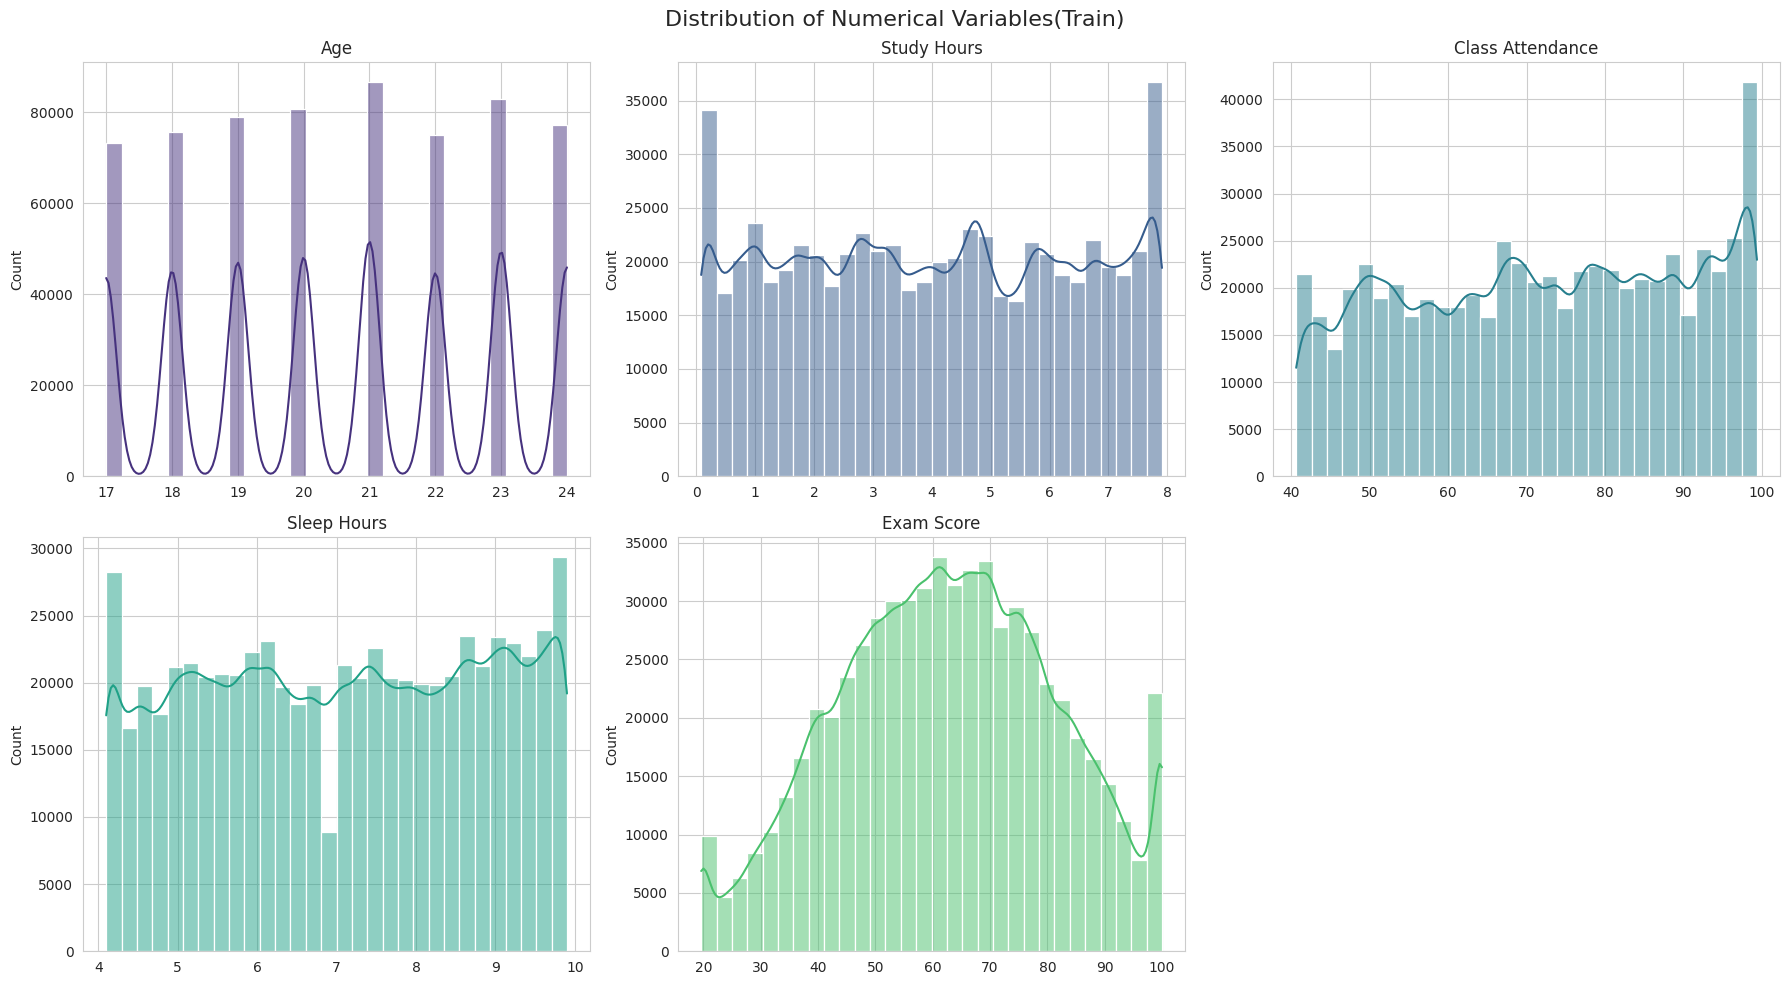

In [12]:
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10))
fig1.suptitle('Distribution of Numerical Variables(Train)', fontsize=16)
axes1 = axes1.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_train[col], kde=True, ax=axes1[i], color=sns.color_palette(palette_num)[i % 5], bins=30)
    axes1[i].set_title(f'{col.replace("_", " ").title()}') # 设置子图标题(下划线变空格、首字母大写)
    axes1[i].set_xlabel('')

for j in range(len(num_cols), len(axes1)):
    fig1.delaxes(axes1[j]) # 删除多余子图

plt.tight_layout()
plt.show()

`Age` 的取值范围为 17~24 岁，各年龄段样本数量较为接近，整体分布近似均匀。
<br>`Age` spans from 17 to 24 years and is discretely distributed across integer values, with sample counts relatively balanced across age groups.

`Study Hours` 覆盖 0~8h 区间，分布整体较为平坦，在区间边界附近观察到密度抬升。
<br>`Study Hours` spans the range from 0 to 8 hours, with an overall relatively flat distribution, and a increase in density observed near the boundaries of the range.

`Class Attendance`出现严重左偏，并且同样在区间边界附近观察到密度抬升
<br>`Class Attendance` exhibits a pronounced left-skewed distribution, with a increase in density observed near the boundaries of the range.

`Sleep Hours` 在 7h 附近存在密度下降，生成模型可能是以 7h 作为阈值。此外，在数值范围的边界附近还观察到密度抬升。
<br>`Sleep Hours` exhibits a decrease in density around 7 hours, which may indicate a threshold used in the data generation process. Additionally, a slight increase in density is observed near the boundaries of the value range.

`Exam Score`呈现出近似正态分布的态势，且在分数范围的两端附近可以看到密度抬升。
<br>`Exam Score` exhibits an approximately normal distribution, with a slight increase in density observed near the boundaries of the range.

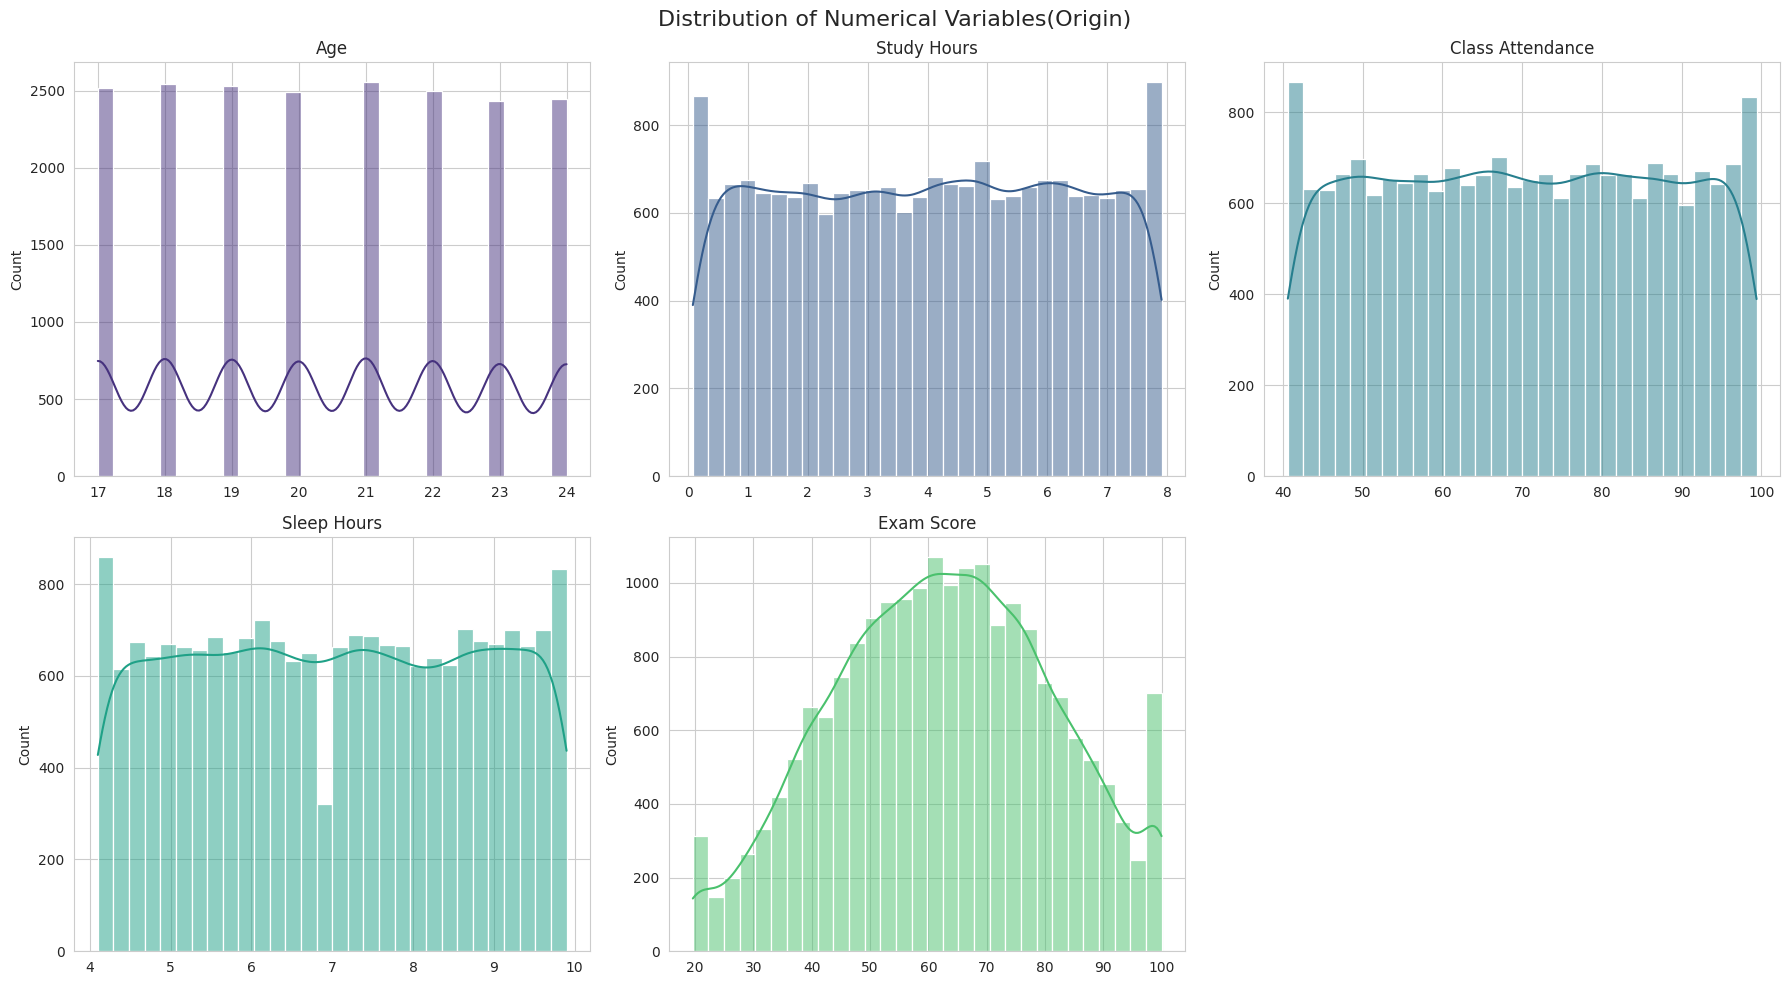

In [13]:
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Distribution of Numerical Variables(Origin)', fontsize=16)
axes2 = axes2.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_origin[col], kde=True, ax=axes2[i], color=sns.color_palette(palette_num)[i % 5], bins=30)
    axes2[i].set_title(f'{col.replace("_", " ").title()}') # 设置子图标题(下划线变空格、首字母大写)
    axes2[i].set_xlabel('')

for j in range(len(num_cols), len(axes2)):
    fig2.delaxes(axes2[j]) # 删除多余子图

plt.tight_layout()
plt.show()

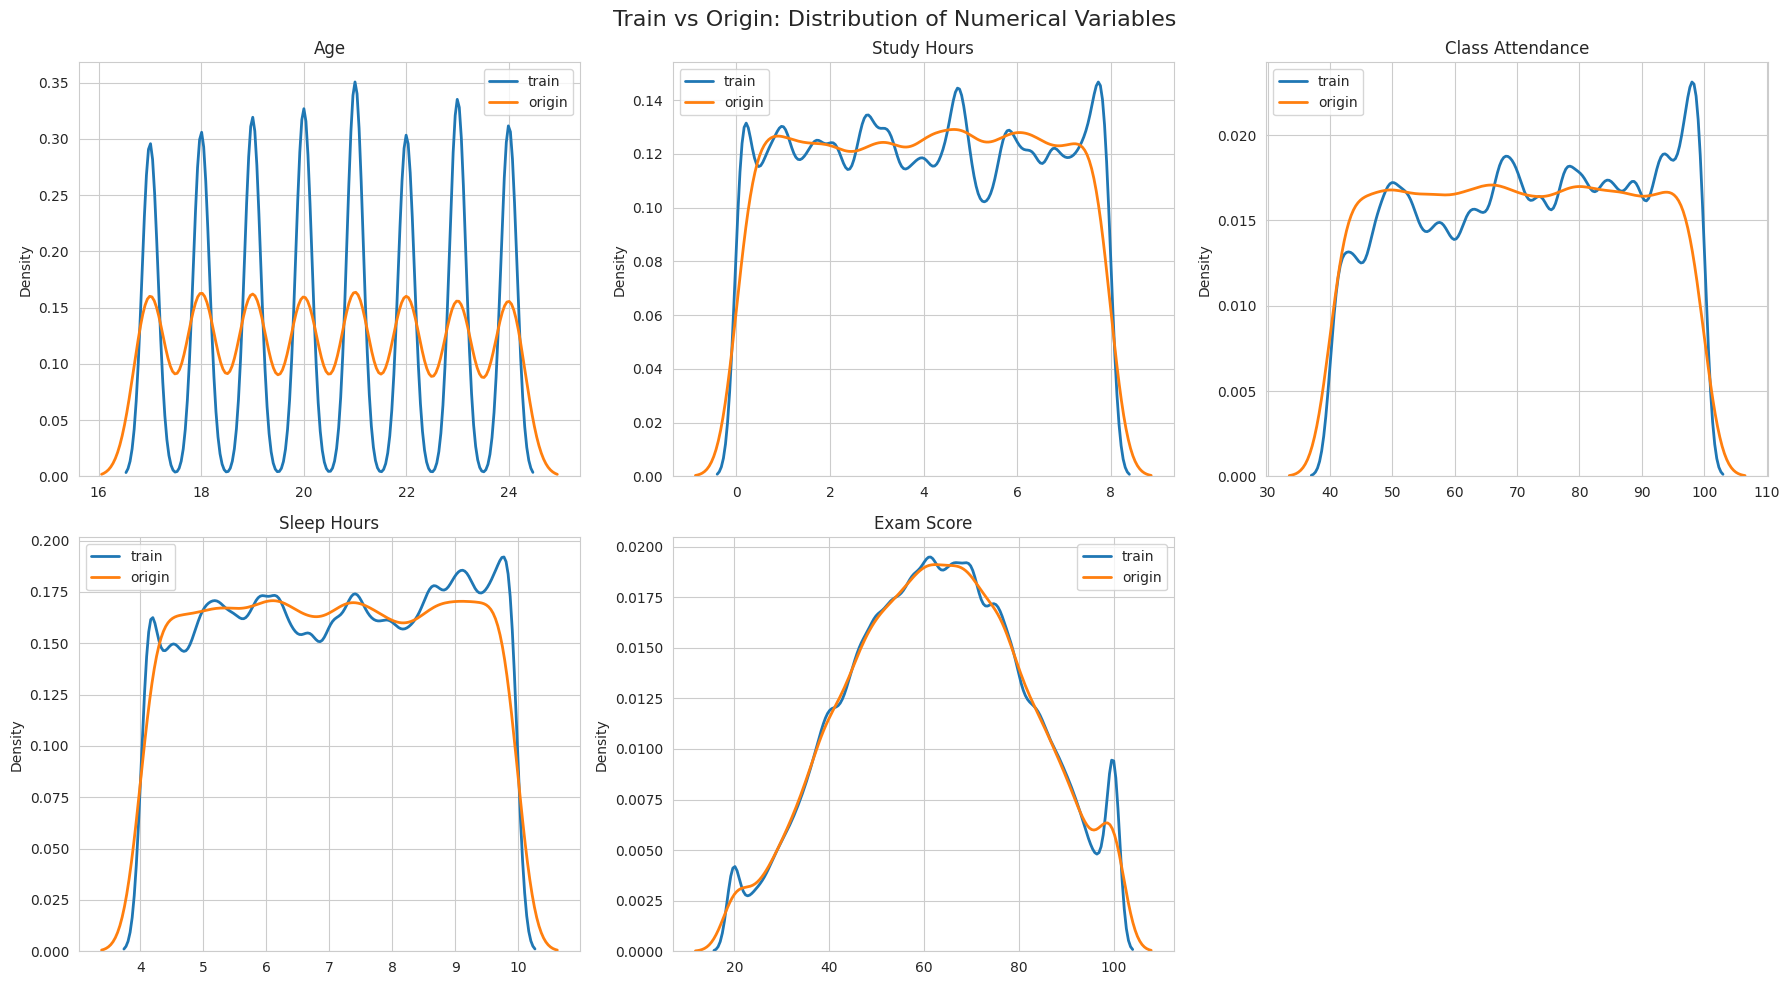

In [14]:
fig3, axes3 = plt.subplots(2, 3, figsize=(18, 10))
fig3.suptitle('Train vs Origin: Distribution of Numerical Variables', fontsize=16)
axes3 = axes3.flatten()

for i, col in enumerate(num_cols):
    # train
    sns.kdeplot(
        df_train[col],
        ax=axes3[i],
        label='train',
        color='tab:blue',
        linewidth=2
    )
    
    # origin
    sns.kdeplot(
        df_origin[col],
        ax=axes3[i],
        label='origin',
        color='tab:orange',
        linewidth=2
    )
    
    axes3[i].set_title(f'{col.replace("_", " ").title()}')
    axes3[i].set_xlabel('')
    axes3[i].legend()

for j in range(len(num_cols), len(axes3)):
    fig3.delaxes(axes3[j])

plt.tight_layout()
plt.show()

相较于 `train` 数据，`origin` 数据的整体分布更加平坦；而在取值区间的边界及局部分布区域，`train` 数据表现出更为显著的局部密度波动。
<br> Compared to the `train` data, the `origin` dataset exhibits a flatter overall distribution; meanwhile, the `train` data shows more pronounced local density fluctuations near the boundaries of the value range and in localized regions.

#### 分类变量的分布情况
#### Distribution of Categorical Variables

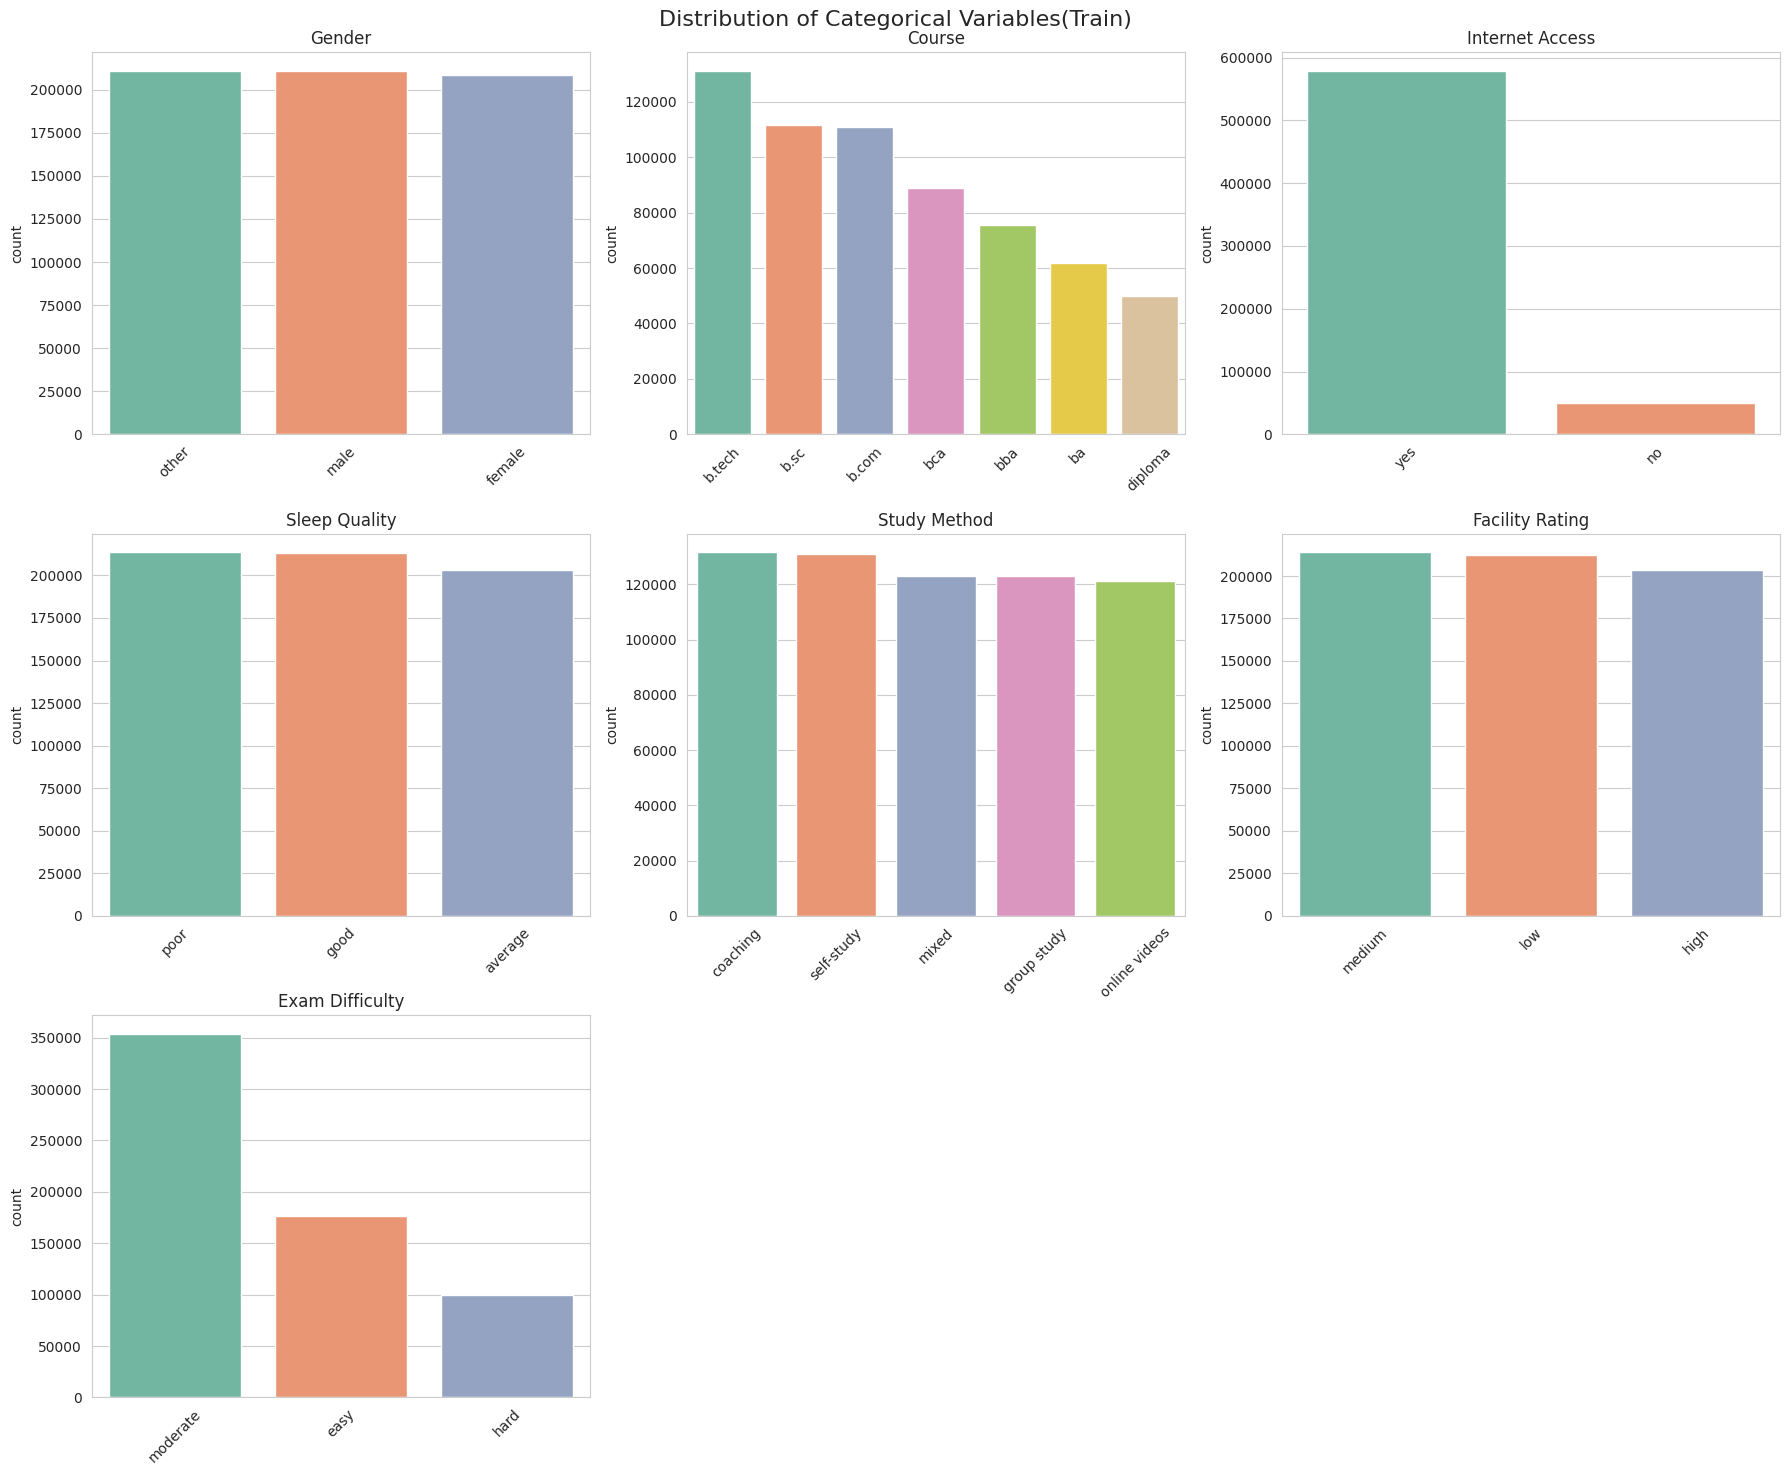

In [15]:
fig4, axes4 = plt.subplots(3, 3, figsize=(18, 15))
fig4.suptitle('Distribution of Categorical Variables(Train)', fontsize=16)
axes4 = axes4.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_train, x=col, ax=axes4[i], palette=palette_cat, order=df_train[col].value_counts().index)
    axes4[i].set_title(f'{col.replace("_", " ").title()}')
    axes4[i].set_xlabel('')
    axes4[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes4)):
    fig4.delaxes(axes4[j])

plt.tight_layout()
plt.show()

`Course` --> 表示学生所就读的学位类型，其中 `b.tech`（工学）、`b.sc`（理学）和 `b.com`（商学）为样本数量较多的类别。
<br> `b.tech` (engineering), `b.sc` (science), and `b.com` (commerce) are the most prevalent categories.

`Internet Acess` --> 具有互联网接入的样本占多数。
<br> the majority of samples indicate the presence of internet access.

`Exam Difficulty` --> `moderate`为出现频率最高的难度等级
<br> `moderate` is the most frequently occurring difficulty level.

`Study Method` --> `coaching` 和 `self-study` 的样本数量高于其他学习方式。
<br> `coaching` and `self-study` have higher sample frequencies compared to other study methods.

对于其余分类变量，各类别的样本分布相对均衡，未呈现出显著的类别不平衡现象。
<br>The remaining categorical variables exhibit relatively balanced category distributions, without pronounced class dominance.

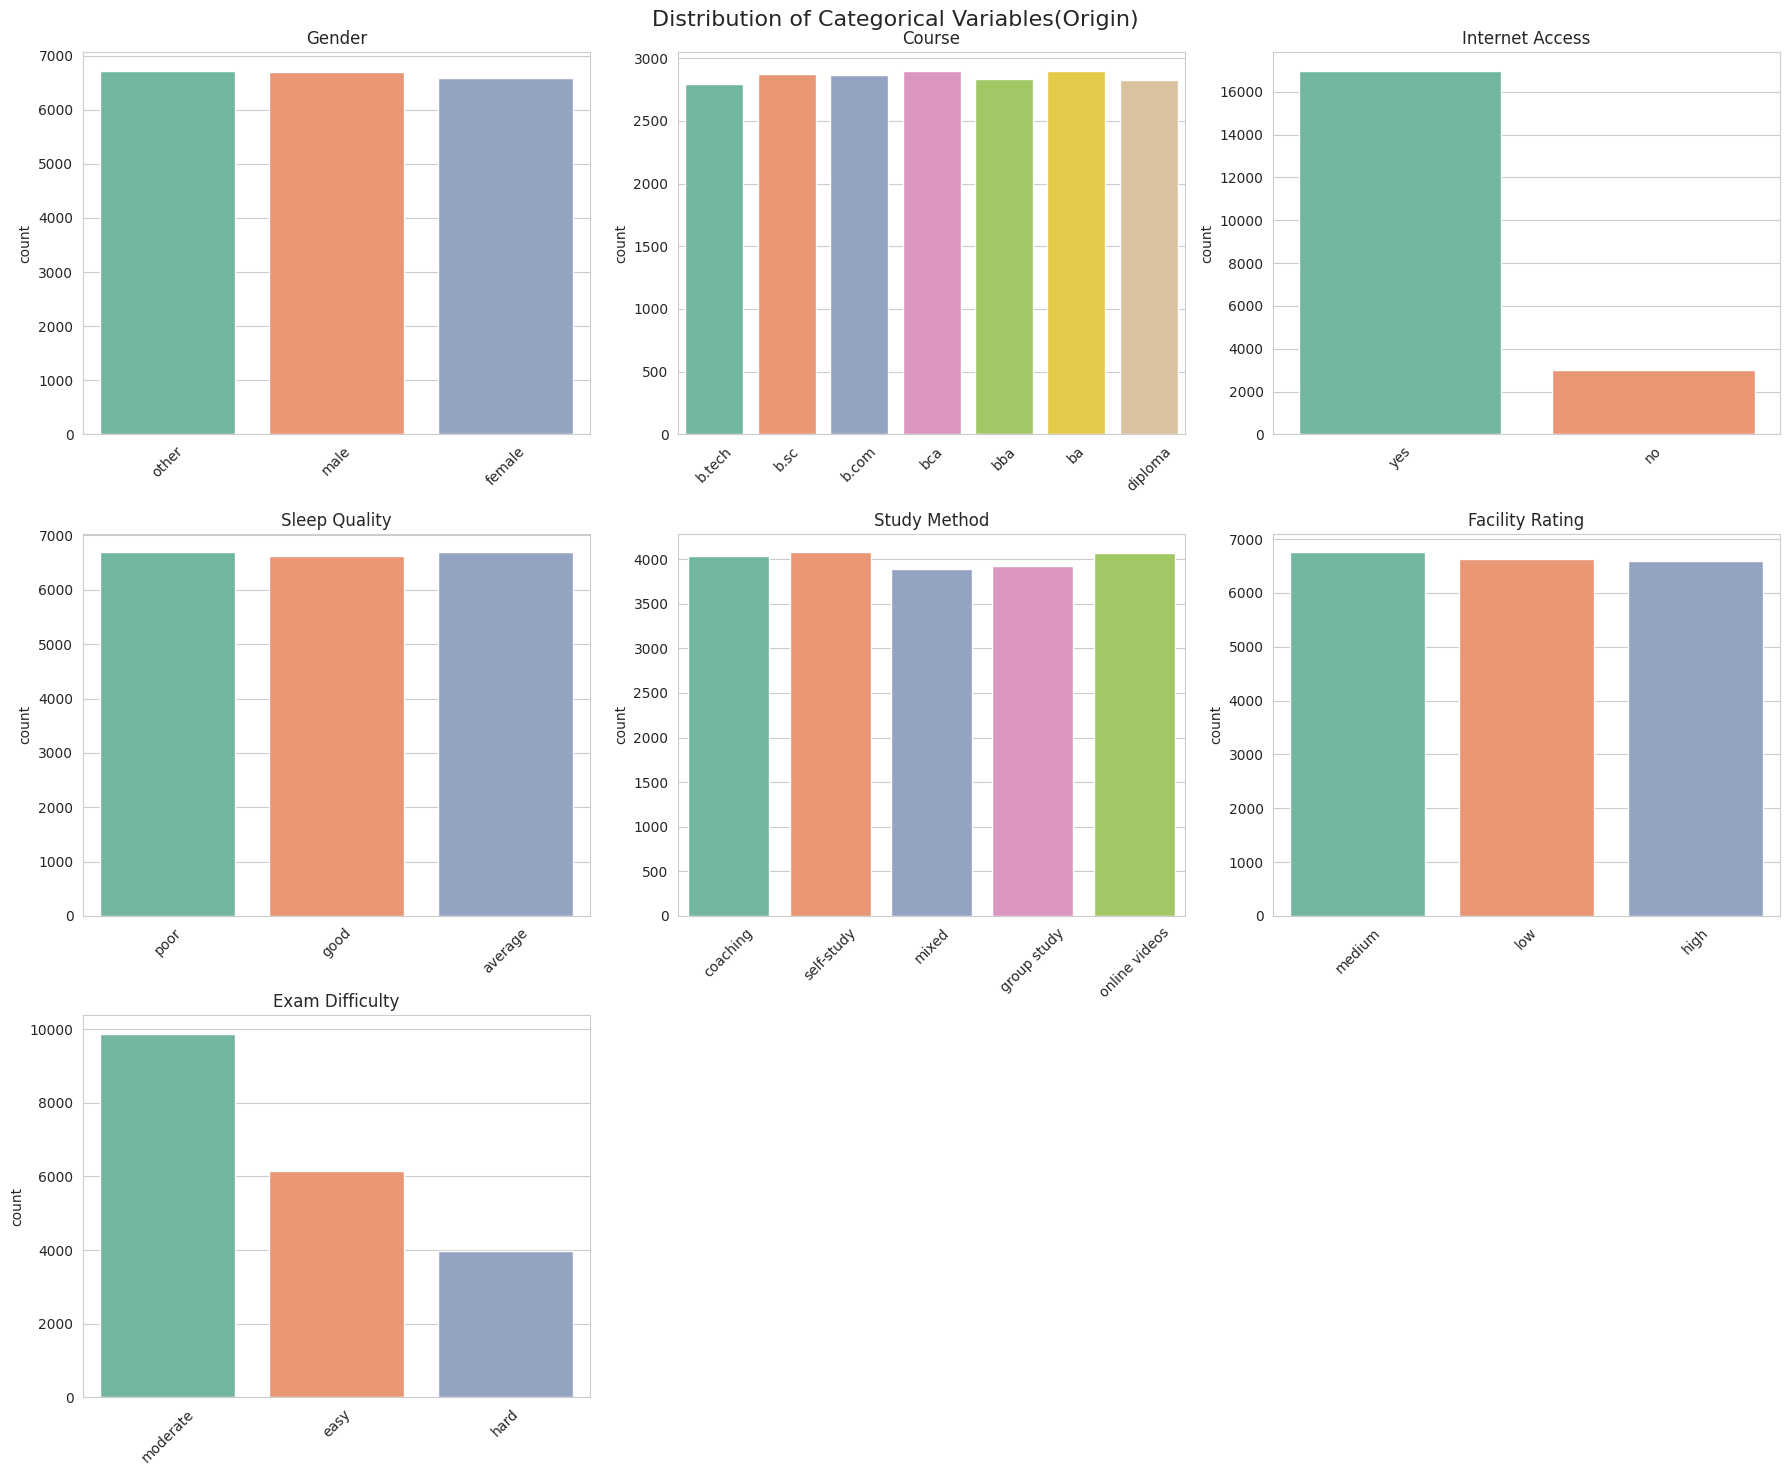

In [16]:
fig5, axes5 = plt.subplots(3, 3, figsize=(18, 15))
fig5.suptitle('Distribution of Categorical Variables(Origin)', fontsize=16)
axes5 = axes5.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_origin, x=col, ax=axes5[i], palette=palette_cat, order=df_train[col].value_counts().index)
    axes5[i].set_title(f'{col.replace("_", " ").title()}')
    axes5[i].set_xlabel('')
    axes5[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes5)):
    fig5.delaxes(axes5[j])

plt.tight_layout()
plt.show()

In [17]:
df_all = pd.concat(
    [
        df_train.reset_index().assign(domain="train"),
        df_origin.reset_index().assign(domain="origin")
    ],
    ignore_index=True
)

def get_ratio(df, col):
    return (
        df.groupby("domain")[col]
          .value_counts(normalize=True, dropna=False)
          .rename("ratio")
          .reset_index()
    )

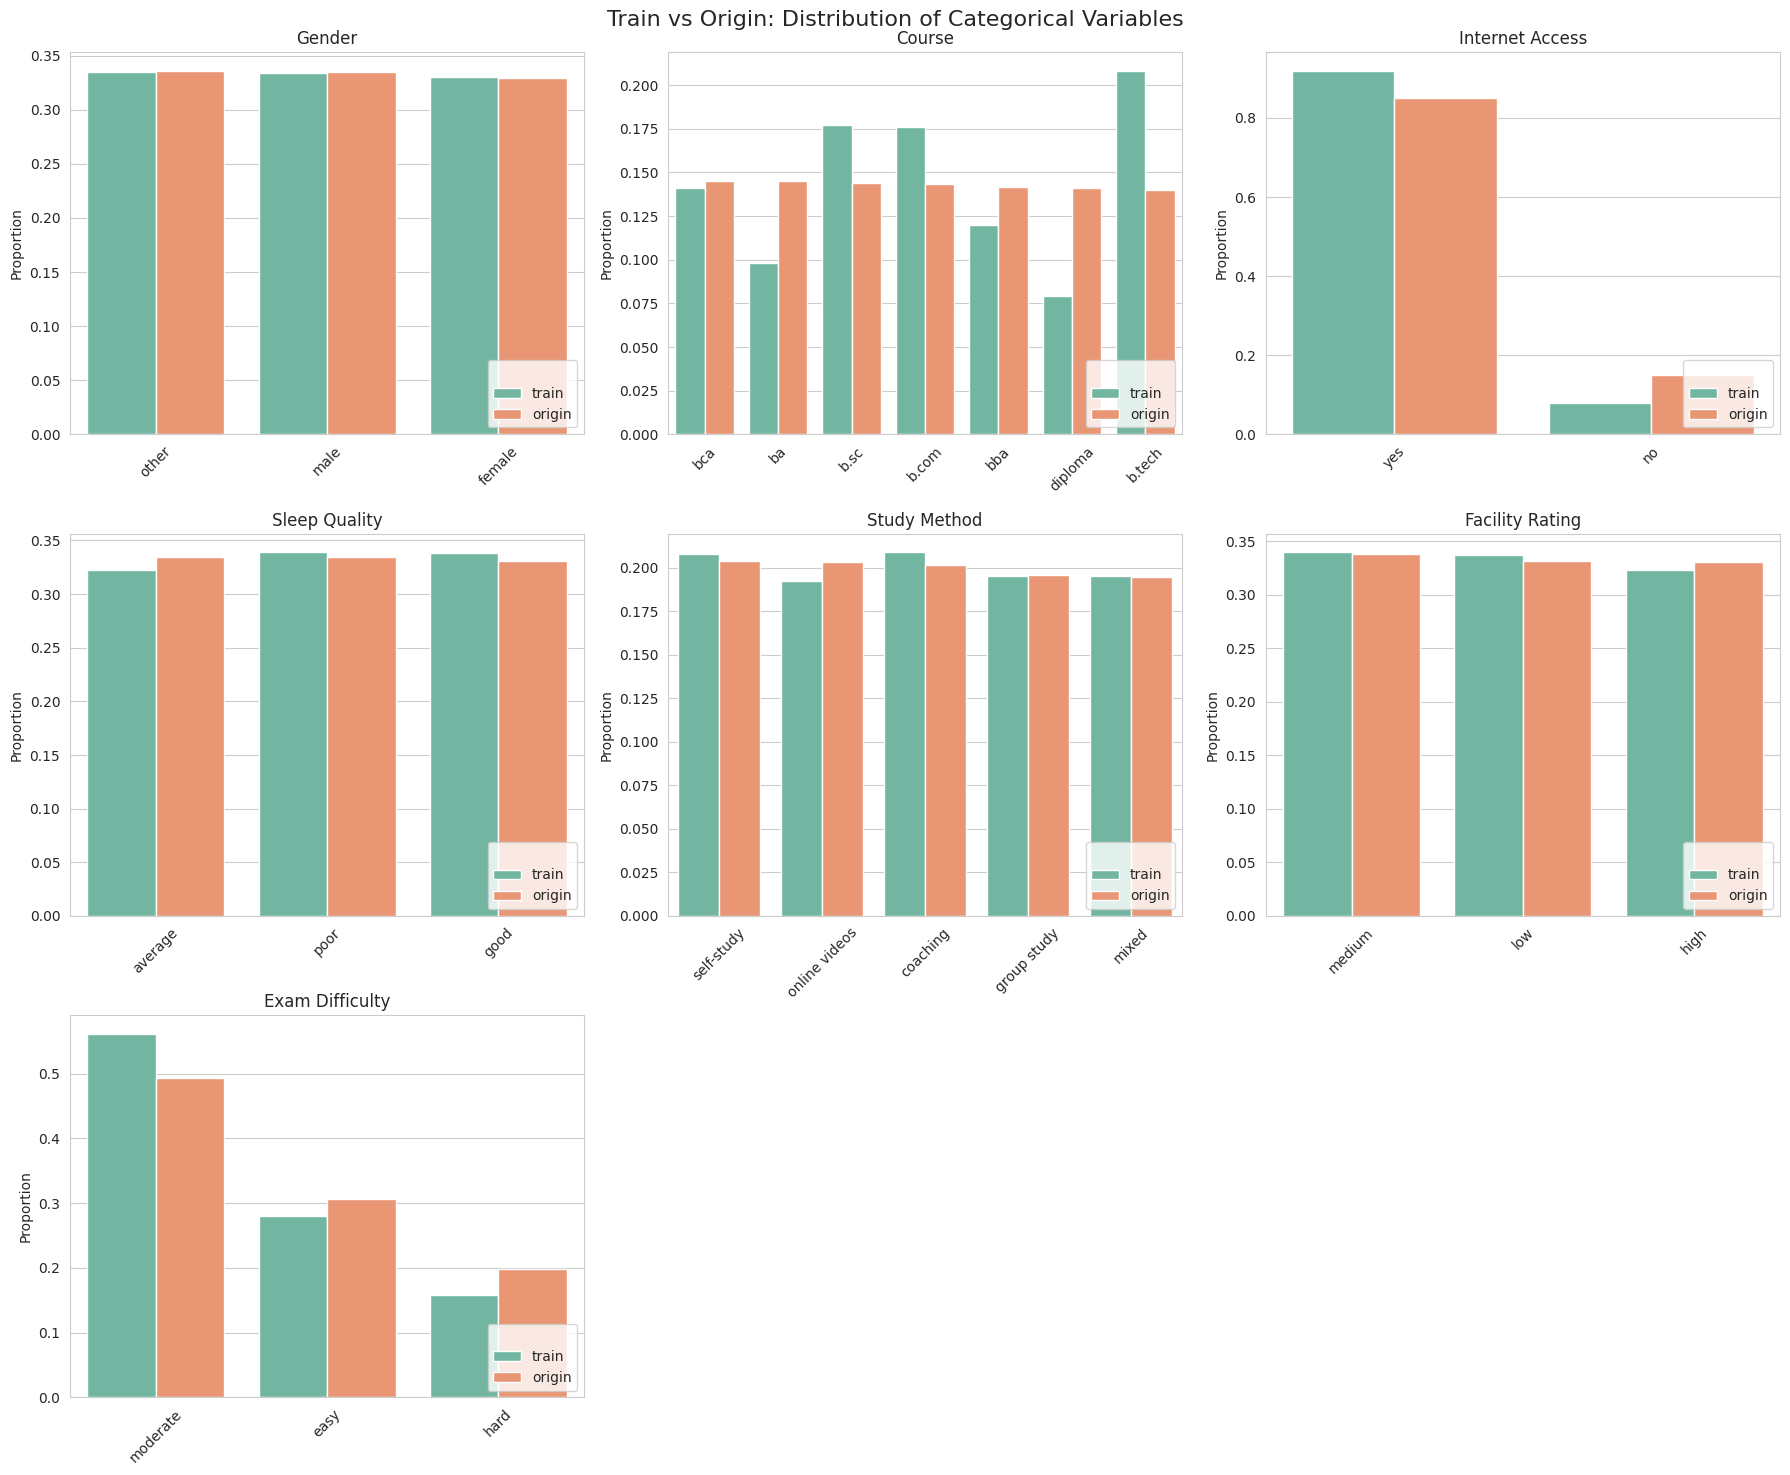

In [18]:
fig6, axes6 = plt.subplots(3, 3, figsize=(18, 15))
fig6.suptitle('Train vs Origin: Distribution of Categorical Variables', fontsize=16)
axes6 = axes6.flatten()

for i, col in enumerate(cat_cols):
    ratio = get_ratio(df_all, col)

    order = df_all[col].value_counts(dropna=False).index

    sns.barplot(
        data=ratio, x=col, y="ratio",
        hue="domain", hue_order = ['train', 'origin'],
        ax=axes6[i], palette="Set2"
    )
    axes6[i].set_title(col.replace("_", " ").title())
    axes6[i].set_xlabel("")
    axes6[i].set_ylabel("Proportion")
    axes6[i].tick_params(axis="x", rotation=45)
    axes6[i].legend(title=" ", loc='lower right')

for j in range(len(cat_cols), len(axes6)):
    fig6.delaxes(axes6[j])

plt.tight_layout()
plt.show()

相较于 `train` 数据，`origin` 数据中 `Course` 的类别分布更加均衡；而在 `Internet Access` 与 `Exam Difficulty` 中，`train` 数据的类别占比差异相较于 `origin` 更为明显，呈现出更强的集中趋势。
<br> Compared to the `train` data, the `origin` dataset exhibits a more balanced category distribution for the `Course` variable; in contrast, for `Internet Access` and `Exam Difficulty`, category proportions in the `train` data are more uneven relative to `origin`, indicating a stronger concentration toward dominant categories.

#### 数值变量与考试成绩
#### Numerical Variables vs Exam Score

In [19]:
rel_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

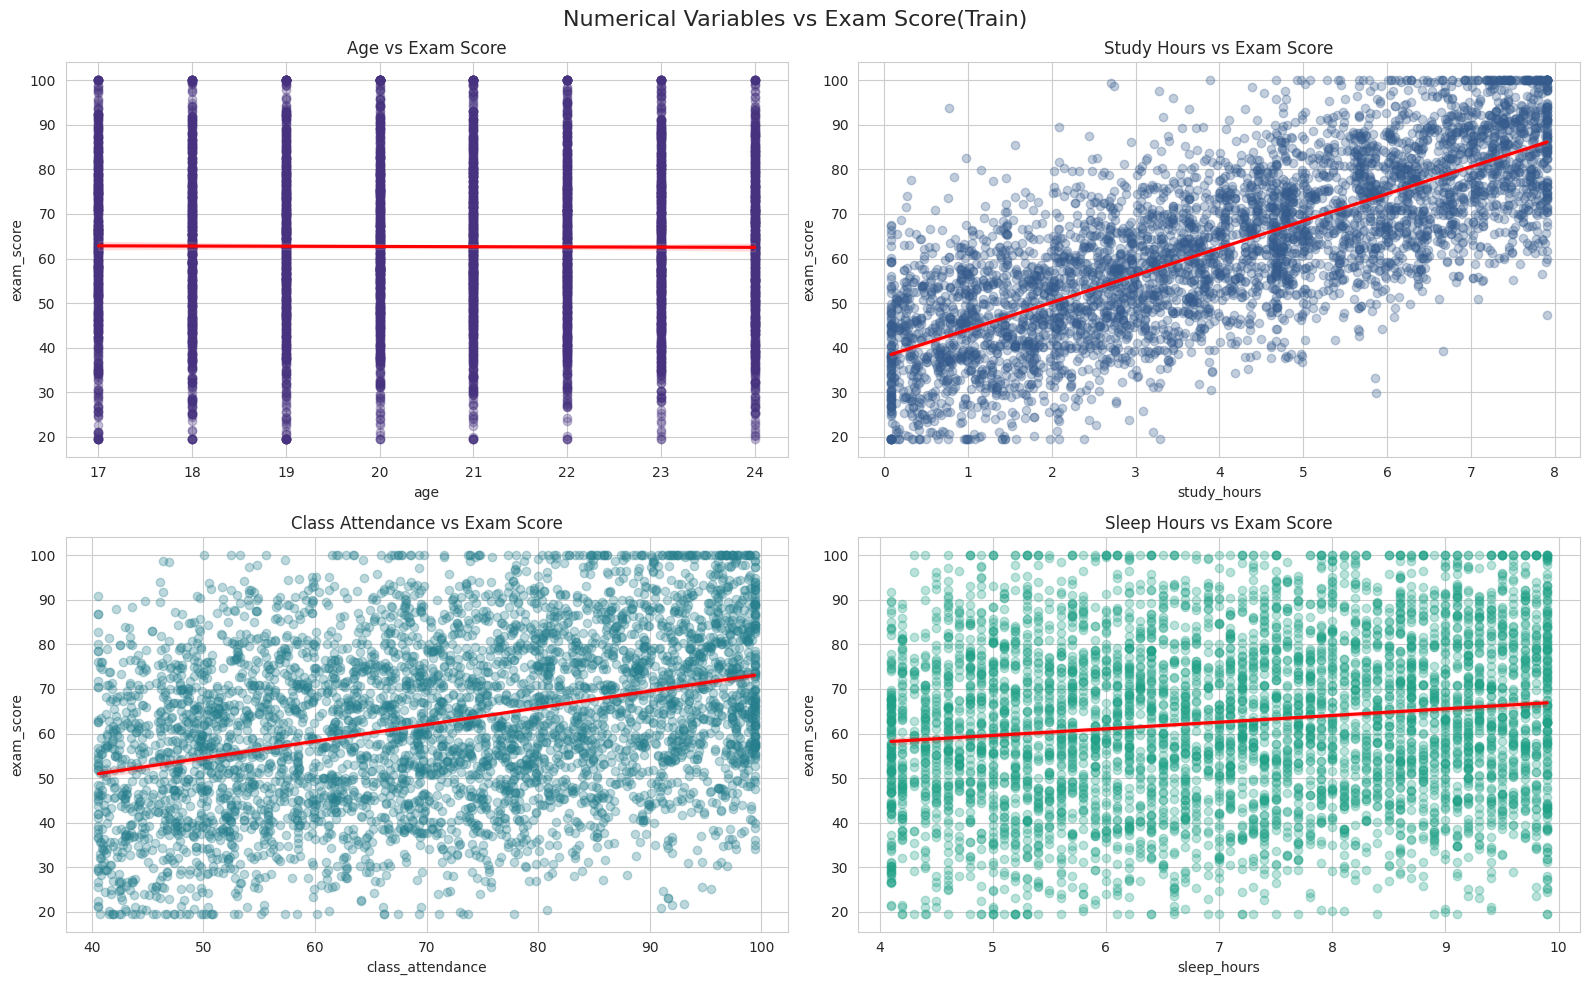

In [20]:
fig7, axes7 = plt.subplots(2, 2, figsize=(16, 10))
fig7.suptitle('Numerical Variables vs Exam Score(Train)', fontsize=16)
axes7 = axes7.flatten()

for i, col in enumerate(rel_cols):
    sns.regplot(data=df_train.sample(5000, random_state=42), x=col, y='exam_score', ax=axes7[i], 
                scatter_kws={'alpha': 0.3, 'color': sns.color_palette(palette_num)[i]}, line_kws={'color': 'red'})
    axes7[i].set_title(f'{col.replace("_", " ").title()} vs Exam Score')

plt.tight_layout()
plt.show()

`Study Hours` 与 `Class Attendance` 均与 `Exam Score` 呈现明显的正相关趋势，其中 `Study Hours` 的相关性相对更为显著。相比之下，`Age` 与 `Sleep Hours` 与 `Exam Score` 的相关性较弱，在当前分析中未表现出明显的线性关系。
<br> Both `Study Hours` and `Class Attendance` exhibit clear positive correlations with `Exam Score`, with `Study Hours `showing a relatively stronger association. In contrast, `Age` and `Sleep Hours` display weaker correlations with `Exam Score` and do not demonstrate a pronounced linear relationship in the current analysis.

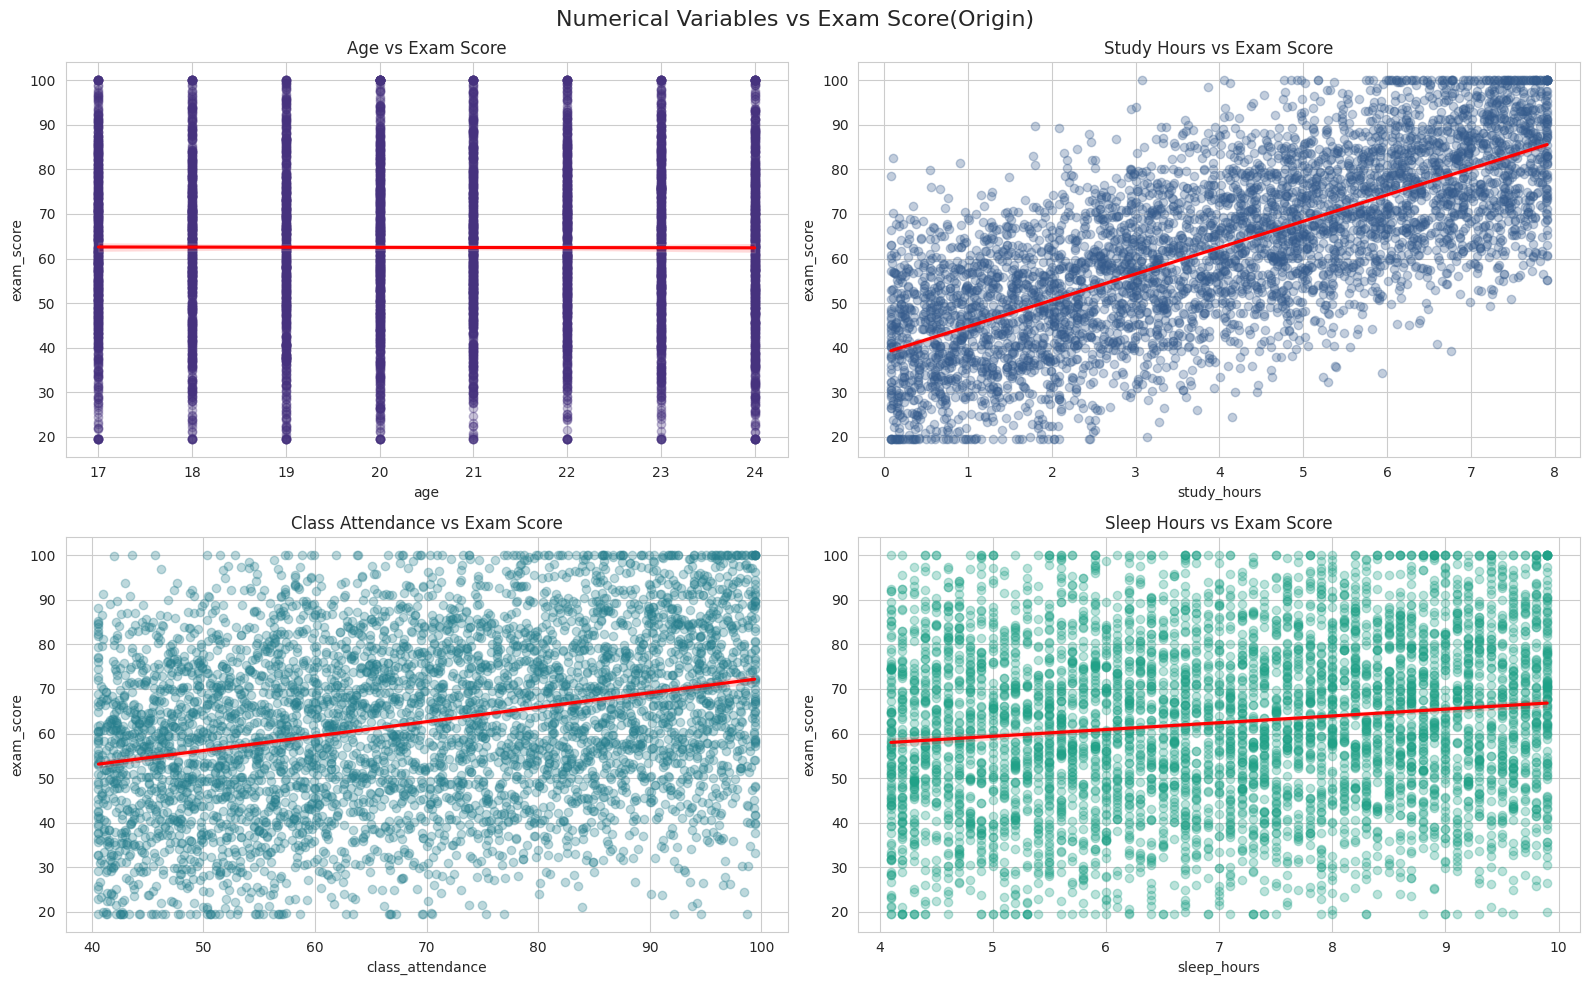

In [21]:
fig8, axes8 = plt.subplots(2, 2, figsize=(16, 10))
fig8.suptitle('Numerical Variables vs Exam Score(Origin)', fontsize=16)
axes8 = axes8.flatten()

for i, col in enumerate(rel_cols):
    sns.regplot(data=df_origin.sample(5000, random_state=42), x=col, y='exam_score', ax=axes8[i], 
                scatter_kws={'alpha': 0.3, 'color': sns.color_palette(palette_num)[i]}, line_kws={'color': 'red'})
    axes8[i].set_title(f'{col.replace("_", " ").title()} vs Exam Score')

plt.tight_layout()
plt.show()

`origin` 数据中数值变量与 `exam_score` 的线性趋势方向与 `train` 数据基本一致。
<br> The linear trend directions between numerical variables and `exam_score` in the `origin` data are largely consistent with those observed in the `train` data.

#### 分类变量与考试成绩
#### Categorical Variables vs Exam Score

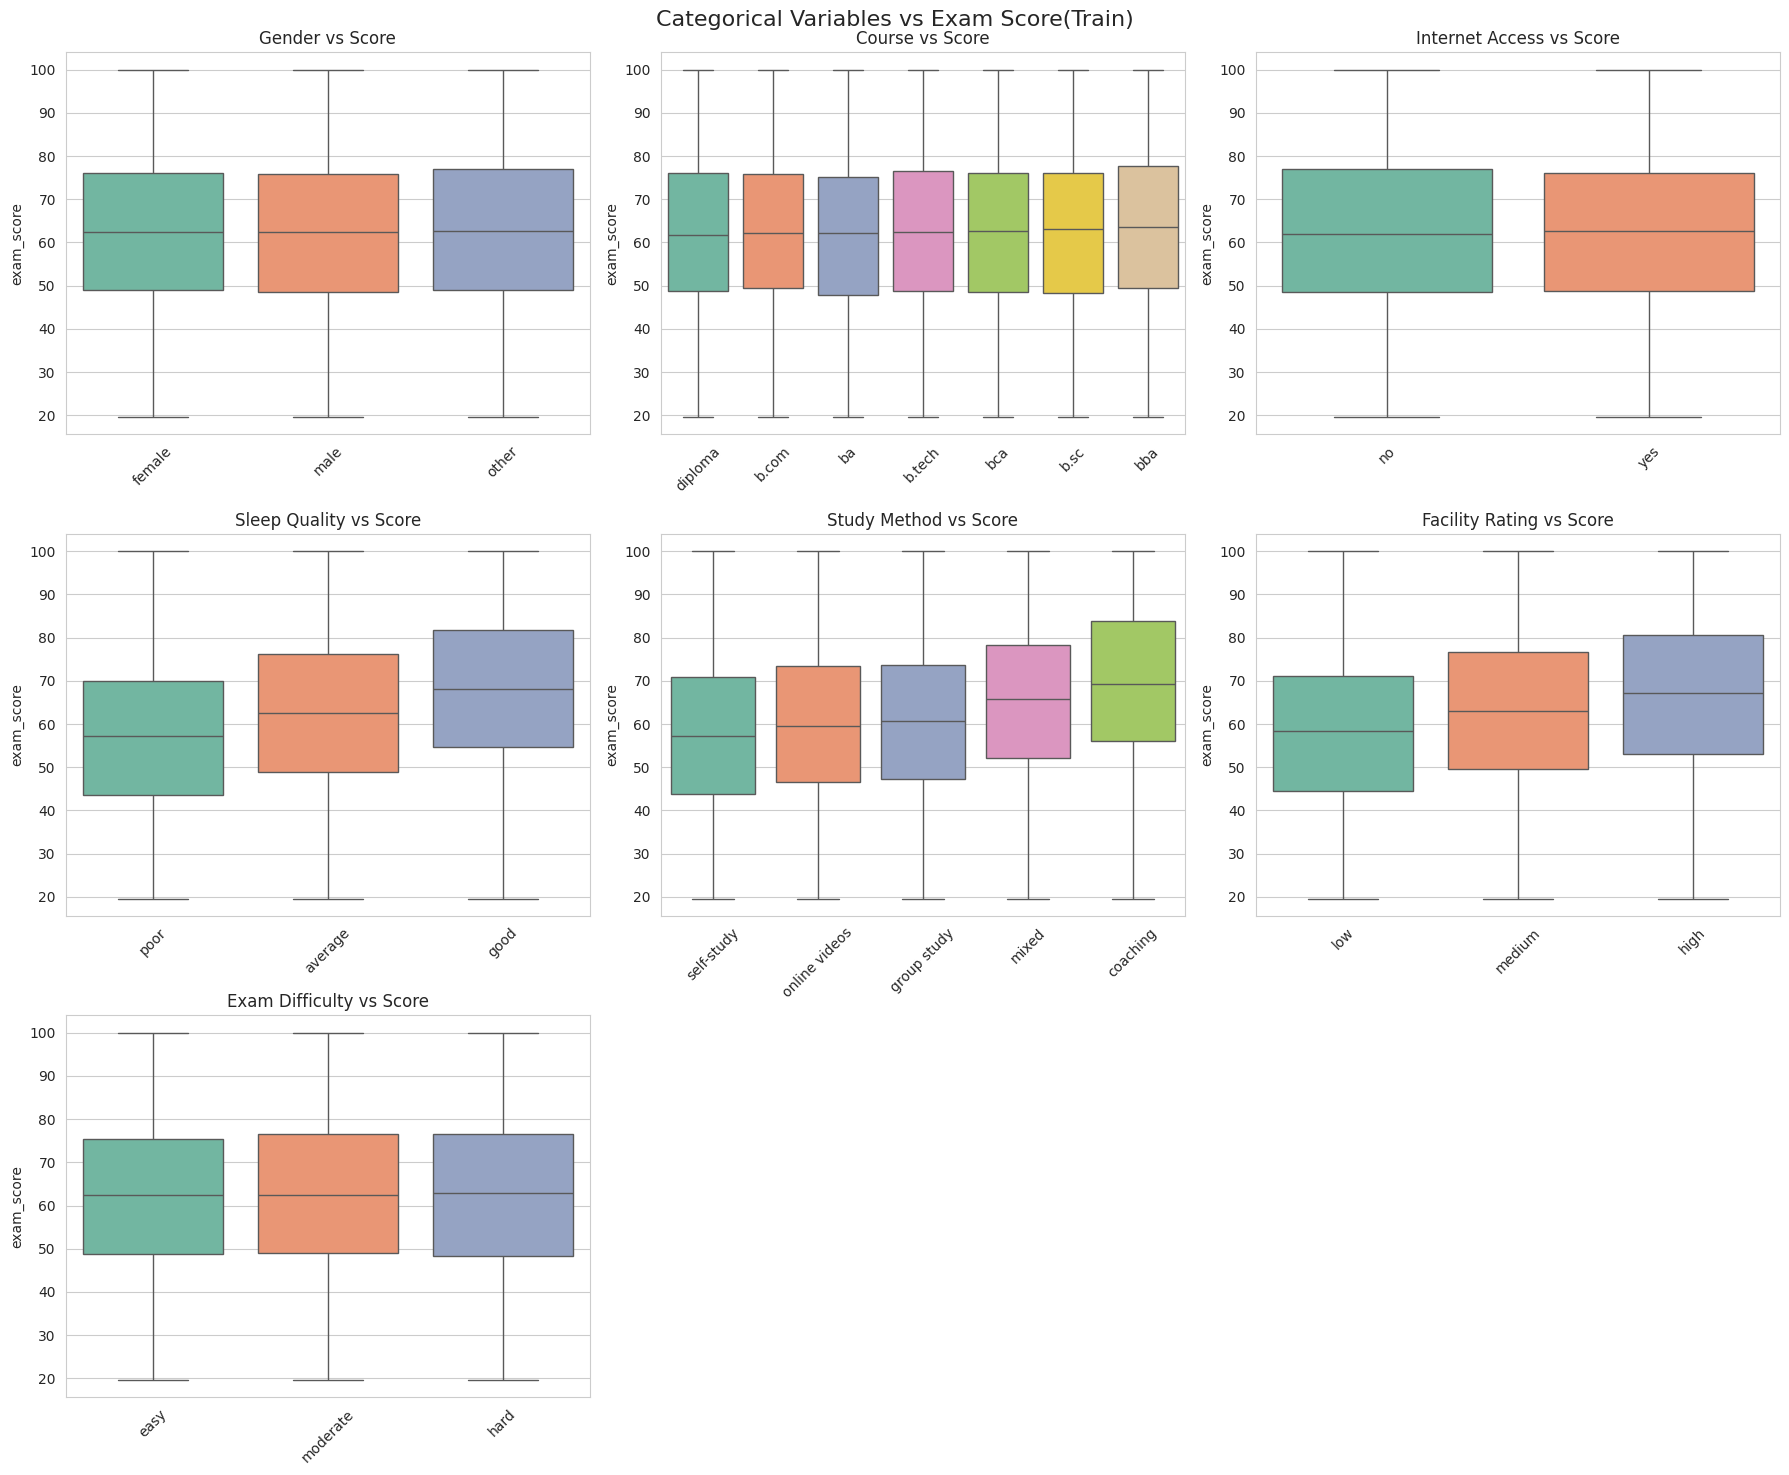

In [22]:
fig9, axes9 = plt.subplots(3, 3, figsize=(18, 15))
fig9.suptitle('Categorical Variables vs Exam Score(Train)', fontsize=16)
axes9 = axes9.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df_train, x=col, y='exam_score', ax=axes9[i], palette=palette_cat, 
                order=df_train.groupby(col)['exam_score'].median().sort_values().index)
    axes9[i].set_title(f'{col.replace("_", " ").title()} vs Score')
    axes9[i].tick_params(axis='x', rotation=45)
    axes9[i].set_xlabel('')

for j in range(len(cat_cols), len(axes9)):
    fig9.delaxes(axes9[j])

plt.tight_layout()
plt.show()

`Sleep Quality` - 不同类别对应的 `exam_score` 分布存在差异(`good` > `average` > `poor`)
<br> Differences in the distribution of `exam_score` are observed across `Sleep Quality` categories.

`Study Method` - 不同学习方式对应的 `exam_score` 均值存在差异，其中 `coaching` 与 `mixed` 两类的平均考试成绩相对较高。
<br> differences in mean `exam_score` are observed across categories, with the `coaching` and `mixed` methods exhibiting relatively higher average scores.

`Facility Rating` - 不同类别对应的 `exam_score` 分布存在差异，但其分布区分度相较于 `Sleep Quality` 略弱。
<br> Differences in the distribution of `exam_score` are observed across categories of `Facility Rating`, although the degree of separation is slightly weaker compared to `Sleep Quality`.

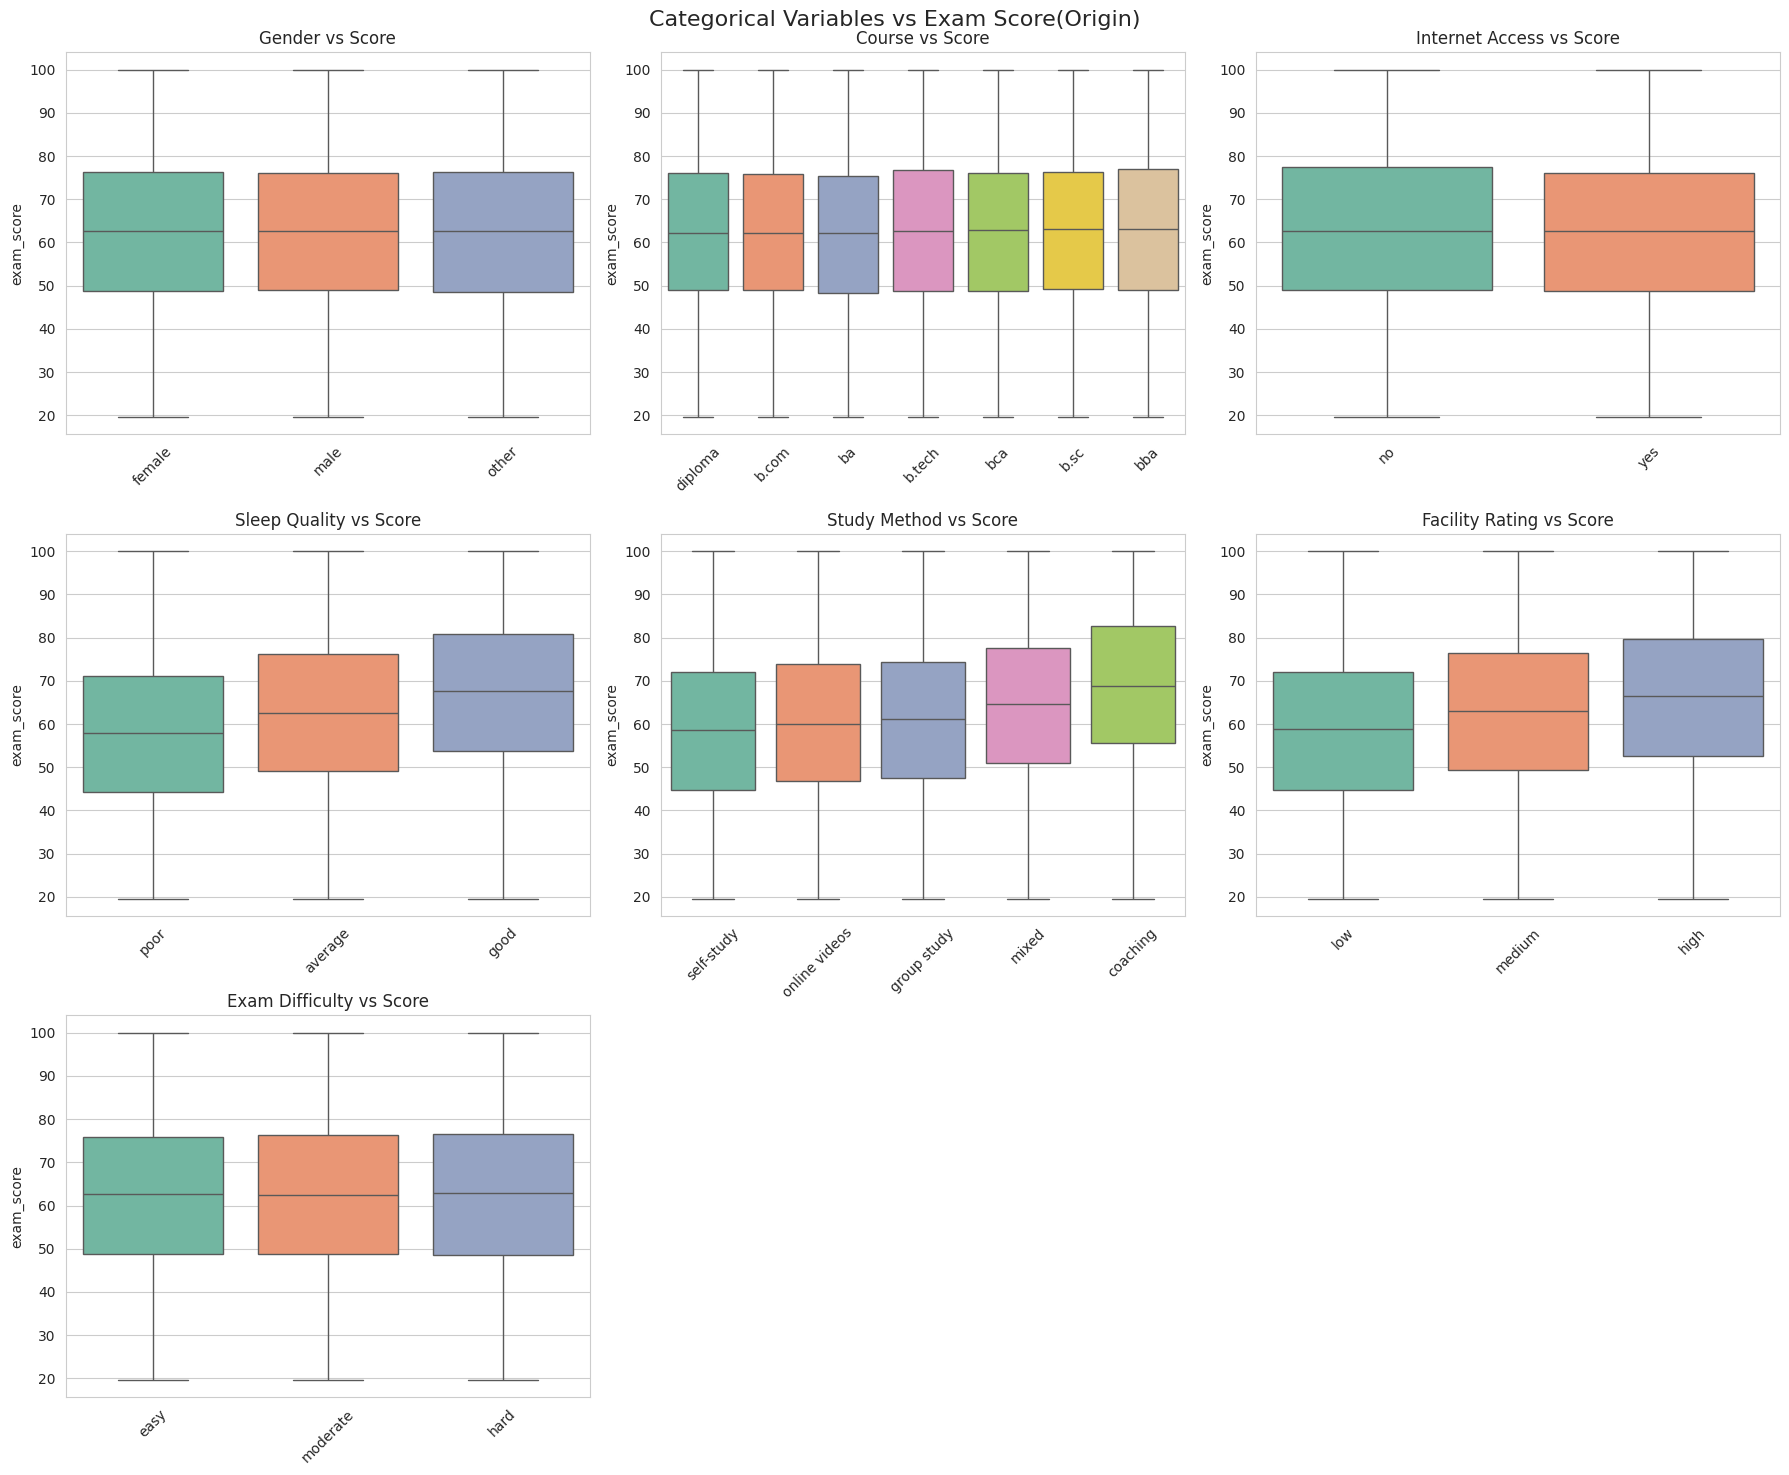

In [23]:
fig10, axes10 = plt.subplots(3, 3, figsize=(18, 15))
fig10.suptitle('Categorical Variables vs Exam Score(Origin)', fontsize=16)
axes10 = axes10.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data=df_origin, x=col, y='exam_score', ax=axes10[i], palette=palette_cat, 
                order=df_train.groupby(col)['exam_score'].median().sort_values().index)
    axes10[i].set_title(f'{col.replace("_", " ").title()} vs Score')
    axes10[i].tick_params(axis='x', rotation=45)
    axes10[i].set_xlabel('')

for j in range(len(cat_cols), len(axes10)):
    fig10.delaxes(axes10[j])

plt.tight_layout()
plt.show()

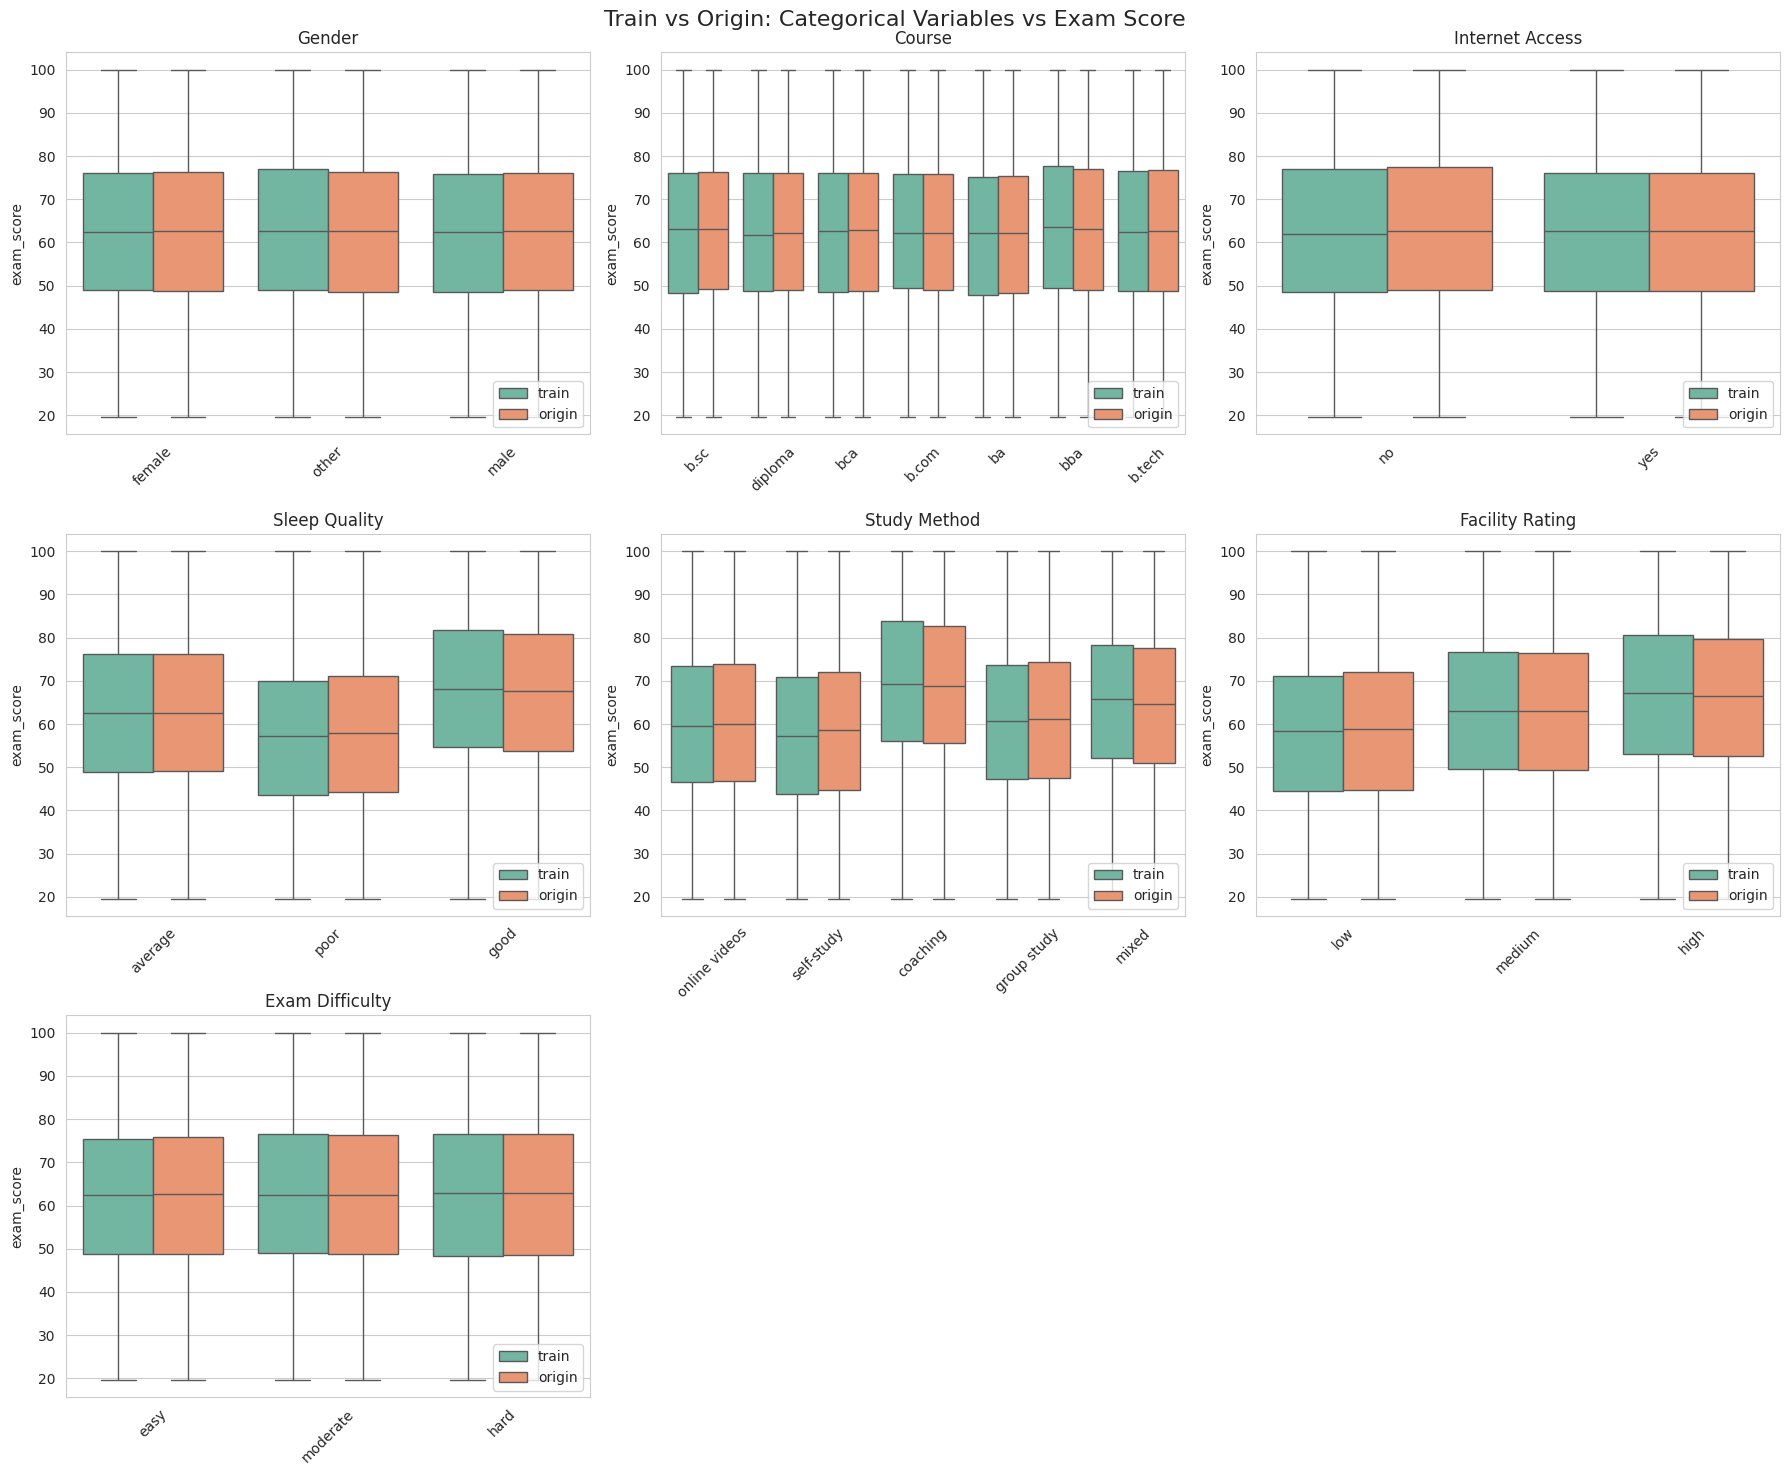

In [24]:
fig11, axes11 = plt.subplots(3, 3, figsize=(18, 15))
fig11.suptitle('Train vs Origin: Categorical Variables vs Exam Score', fontsize=16)
axes11 = axes11.flatten()

for i, col in enumerate(cat_cols):
    order = (df_all.groupby(col)['exam_score'].median().sort_values().index)

    sns.boxplot(
        data=df_all,x=col,y='exam_score',
        hue='domain',hue_order = ['train', 'origin'],
        ax=axes11[i],palette=palette_cat
    )

    axes11[i].set_title(col.replace("_", " ").title())
    axes11[i].set_xlabel('')
    axes11[i].tick_params(axis='x', rotation=45)
    axes11[i].legend(title='', loc='lower right')

for j in range(len(cat_cols), len(axes11)):
    fig11.delaxes(axes11[j])

plt.tight_layout()
plt.show()

`origin` 数据中，各分类变量与 `exam_score` 的分布形态与 `train` 数据基本一致。

#### 分类变量下数值变量与考试成绩关系的分析
#### Relationship Between Numerical Variables and Exam Score Across Categorical Groups

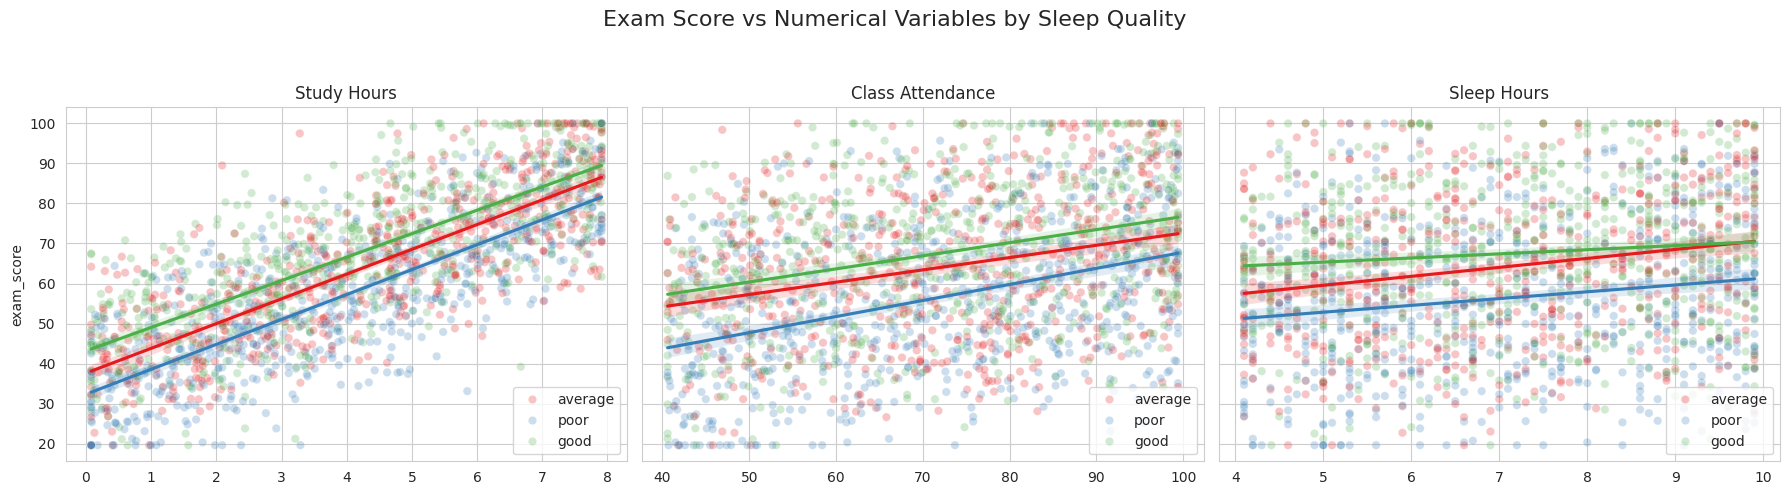

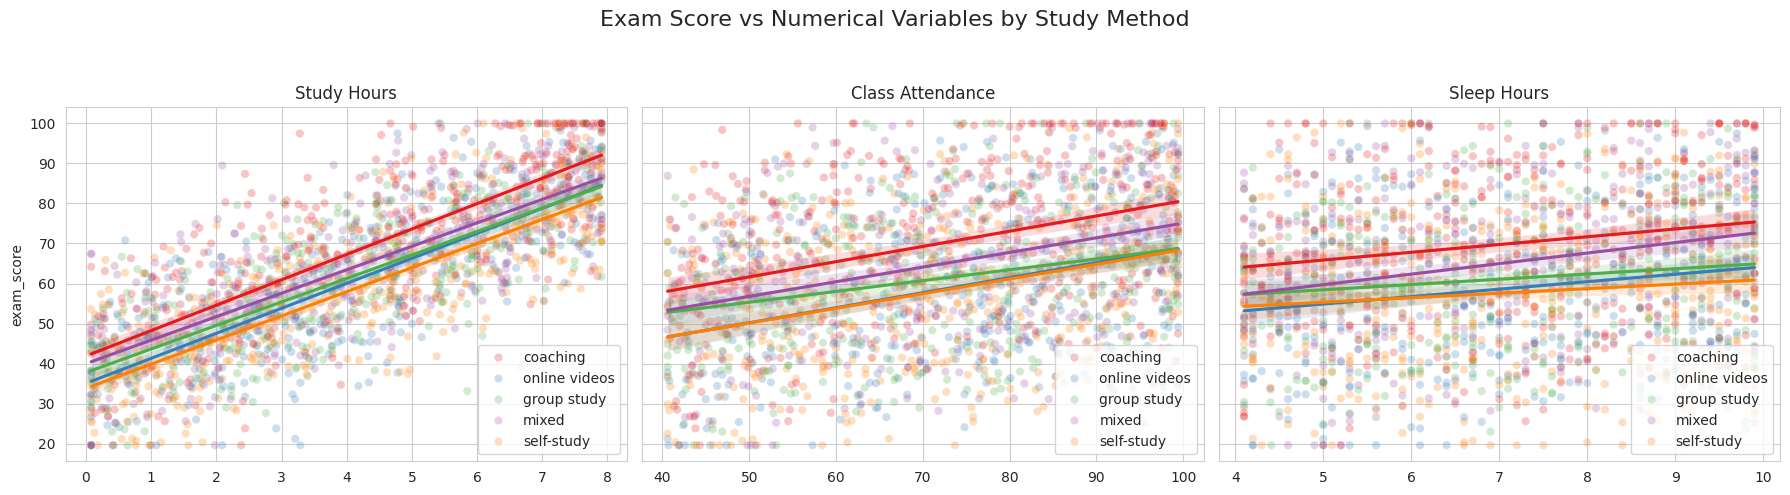

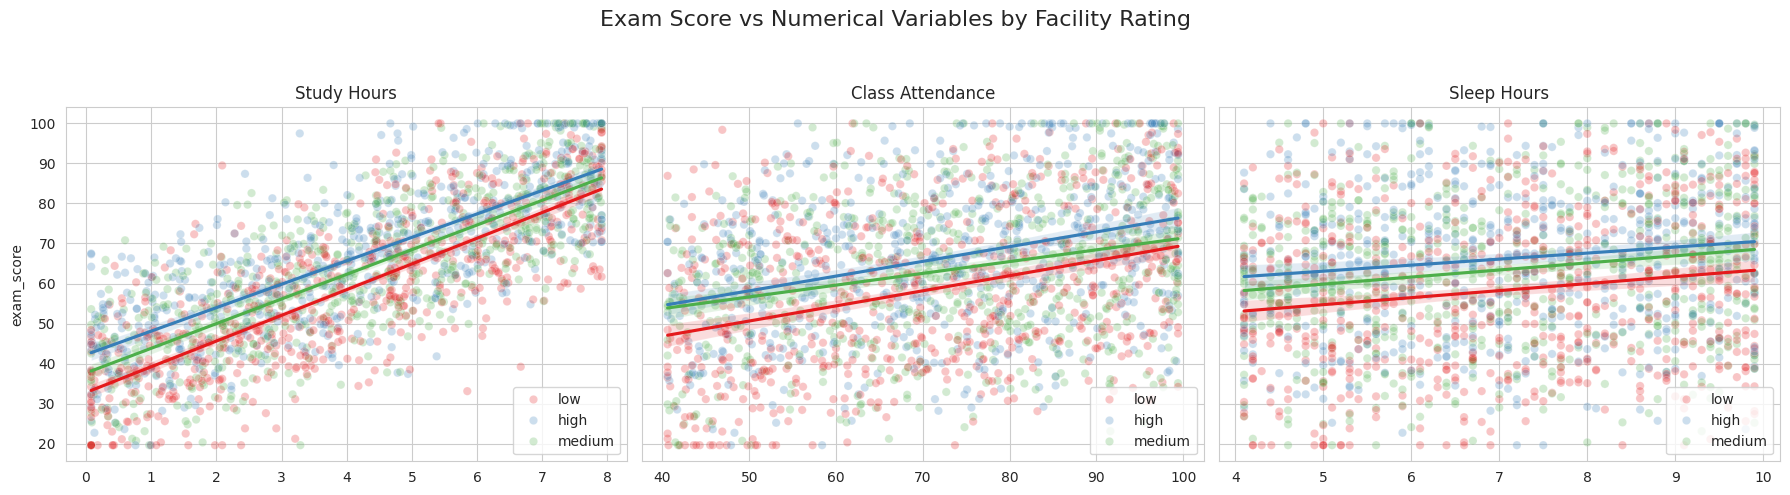

In [25]:
x_vars = ['study_hours', 'class_attendance', 'sleep_hours']
hue_vars = ['sleep_quality', 'study_method', 'facility_rating']

for hue in hue_vars:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(
        f'Exam Score vs Numerical Variables by {hue.replace("_"," ").title()}',
        fontsize=16
    )
    
    df_plot = df_train.sample(2000, random_state=42)

    for i, x in enumerate(x_vars):
        sns.scatterplot(
            data=df_plot,
            x=x, y='exam_score', hue=hue,
            ax=axes[i],
            alpha=0.25, palette='Set1',
        )

        levels = df_plot[hue].dropna().unique()
        palette = sns.color_palette('Set1', len(levels))

        for level, color in zip(levels, palette):
            sns.regplot(
                data=df_plot[df_plot[hue] == level],
                x=x,
                y='exam_score',
                ax=axes[i],
                scatter=False,
                order=1,
                color=color
            )

        axes[i].set_title(x.replace("_", " ").title())
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x')
        axes[i].legend(title='',loc='lower right')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

`sleep_quality` x `study_hours` - 线性趋势近似平行，各组的线性关系强度基本一致；组间差异主要体现为整体成绩水平的偏移，而非斜率的显著变化。
<br> The linear trends are approximately parallel across groups, indicating similar linear effect strengths. Differences between groups are mainly reflected as shifts in overall score levels rather than significant changes in slope.

`sleep_quality` x `class_attendance` - 同`sleep_quality` x `study_hours`。
<br> Similar to `sleep_quality` × `study_hours`.

`sleep_quality` x `sleep_hours` - `poor` 整体成绩水平较低，而其余睡眠质量对应的线性趋势之间存在交叉，不同睡眠质量下 `sleep_hours` 与 `exam_score` 的关系强度存在差异。
<br> The `poor` group exhibits a lower overall score level, while the remaining `sleep_quality` categories show intersecting linear trends, indicating heterogeneous relationship strengths between `sleep_hours` and `exam_score` across groups.

`study_method` - `coaching` 整体成绩水平较高，而其余学习方式对应的线性趋势之间存在明显交叉。表明在不同学习方法条件下，多项数值变量与 `exam_score` 的关系结构呈现差异化特征。
<br> The `coaching` group exhibits a higher overall score level, while the remaining study methods show clearly intersecting linear trends, indicating heterogeneous relationship structures between multiple numerical variables and `exam_score` across learning methods.

`facility_rating` - 线性趋势整体近似平行，并呈现出稳定的层级关系（high > medium > low），差异主要体现在整体成绩水平上。
<br> The linear trends are largely parallel across levels and exhibit a clear hierarchical pattern (high > medium > low), indicating that facility rating mainly affects overall score levels rather than altering the strength of linear relationships.

#### 相关性热力图
#### Correlation Heatmap

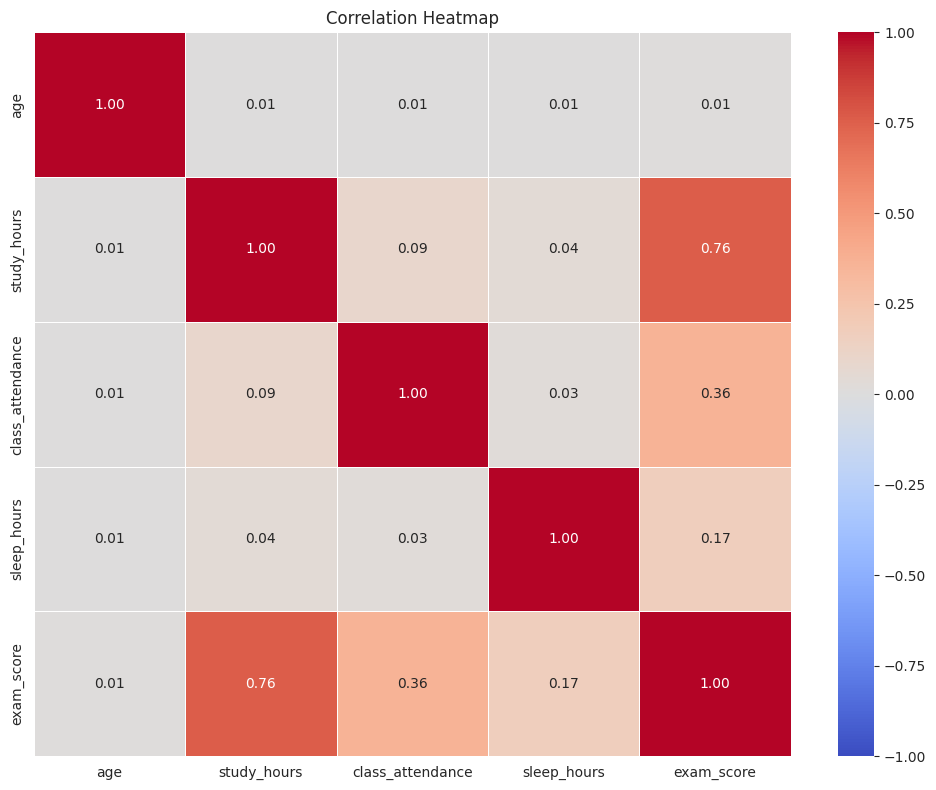

In [26]:
plt.figure(figsize=(10, 8))
corr_matrix = df_train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 1. Feature Engineering

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturePipeline(BaseEstimator, TransformerMixin):
    L1_FEATURES = [
        'study_hours',
        'class_attendance',
        'sleep_quality',
        'study_method',
        'facility_rating'
    ]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        missing = set(self.L1_FEATURES + ['sleep_hours']) - set(X.columns)
        if missing:
            raise ValueError(f'Missing required features: {missing}')

        study_method_coaching = (X['study_method'] == 'coaching').astype(int)
        sleep_quality_poor = (X['sleep_quality'] == 'poor').astype(int)

        # L2_FEATURES
        X['study_coaching_x_study_hours'] = study_method_coaching * X['study_hours']
        X['study_coaching_x_class_attendance'] = study_method_coaching * X['class_attendance']
        X['study_coaching_x_sleep_hours'] = study_method_coaching * X['sleep_hours']
        X['sleep_poor_x_sleep_hours'] = sleep_quality_poor * X['sleep_hours']

        return X

# 2. CatBoost

In [28]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor


def CatBoost_L12(X_train, y_train, X_test, n_splits=5, seed=42, source_col='source'):
    """
    return:
        oof        : ndarray, shape (n_train,)
        preds_test : ndarray, shape (n_test,)
    """
    if source_col not in X_train.columns:
        raise ValueError(f"'{source_col}' not found in X_train. Please add it outside the function.")
    
    strat_y = X_train[source_col].astype(str)

    X_train_model = X_train.drop(columns=[source_col])
    X_test_model = X_test.drop(columns=[source_col]) if source_col in X_test.columns else X_test.copy()
    
    fp = FeaturePipeline()
    X_fe = fp.fit_transform(X_train_model)
    X_test_fe = fp.transform(X_test_model)

    cat_features = X_fe.select_dtypes(include=["object", "category"]).columns.tolist()

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

    oof = np.zeros(len(X_fe))
    preds_test = np.zeros(len(X_test_fe))
    cv_scores, best_iters = [], []

    for fold, (tr_idx, val_idx) in enumerate(skf.split(X_fe, strat_y), 1):
        X_tr, X_val = X_fe.iloc[tr_idx], X_fe.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        model = CatBoostRegressor(
            iterations=3000,
            learning_rate=0.05,
            depth=8,
            task_type="GPU",
            loss_function="RMSE",
            random_seed=seed,
            verbose=False,
            cat_features=cat_features,
            early_stopping_rounds=200,
            thread_count=-1
        )

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), use_best_model=True)

        oof[val_idx] = model.predict(X_val)
        preds_test += model.predict(X_test_fe) / n_splits

        rmse = np.sqrt(mean_squared_error(y_val, oof[val_idx]))
        cv_scores.append(rmse)
        best_iters.append(model.best_iteration_)

        print(f"Fold {fold}: RMSE = {rmse:.5f}, best_iter = {model.best_iteration_}")

    print(
        f"\nCV = {np.mean(cv_scores):.5f} ± {np.std(cv_scores):.5f}, "
        f"Avg best iter = {int(np.mean(best_iters))}"
    )

    return oof, preds_test

In [29]:
TARGET = 'exam_score'

df_train_source = df_train.copy()
df_train_source["source"] = "synthetic"
df_origin_source = df_origin.copy()
df_origin_source["source"] = "origin"

df_all = pd.concat(
    [
        df_train_source.reset_index(drop=True),
        df_origin_source.reset_index(drop=True)
    ],
    axis=0,
    ignore_index=True
)

X = df_all.drop(columns=[TARGET])
y = df_all[TARGET]
X_test = df_test.copy()

In [30]:
oof, preds_test = CatBoost_L12(X, y, X_test)

# submission = pd.DataFrame({
#     "id": df_test.index,
#     "exam_score": preds_test
# })

# submission.to_csv("submission.csv", index=False)

# LB = 8.75061

Fold 1: RMSE = 8.84889, best_iter = 2223
Fold 2: RMSE = 8.78288, best_iter = 2181
Fold 3: RMSE = 8.80349, best_iter = 2277
Fold 4: RMSE = 8.82716, best_iter = 1664
Fold 5: RMSE = 8.81744, best_iter = 1774

CV = 8.81597 ± 0.02219, Avg best iter = 2023


#### 全量训练
#### Final Model

In [31]:
fp = FeaturePipeline()
X_train_model = X.drop(columns=['source']) if 'source' in X.columns else X.copy()
X_test_model  = X_test.drop(columns=['source']) if 'source' in X_test.columns else X_test.copy()

X_fe = fp.fit_transform(X_train_model)
X_test_fe = fp.transform(X_test_model)

cat_features = X_fe.select_dtypes(include=["object", "category"]).columns.tolist()


avg_best_iter = 1964
final_model = CatBoostRegressor(
    iterations=avg_best_iter,
    learning_rate=0.05,
    depth=8,
    task_type="GPU",
    loss_function="RMSE",
    random_seed=42,
    verbose=False,
    cat_features=cat_features,
    thread_count=-1
)

final_model.fit(X_fe, y)

pred_final = final_model.predict(X_test_fe)

submission = pd.DataFrame({
    "id": df_test.index,
    "exam_score": pred_final
})
submission.to_csv("submission.csv", index=False)